# 휴대폰 브랜드 이탈 고객 조사

In [43]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

### 컬럼명 정리 (21, 22, 23)

| 원본 컬럼명                     | 정리된 컬럼명        |
|---------------------------------|-------------------|
| 고객 고유 번호                | pid                 |
| 스마트폰 제조사                | brand               |
| 이메일                          | email               |
| 메신저                          | messenger           |
| 블로그                          | blog                |
| 클라우드                        | cloud               |
| 온라인 음성통화 여부               | call_check          |
| 년간 서비스 구매 이용 채널          | service_purchase    |
| 모바일 간편 송금                  | money_transfer      |
| 신용카드 저장 (모바일에 신용카드 저장) | credit_card       |
| 통신사 가격                      | agency_purchase     |
| 기기 가격                       | machine_purchase    |
| 가격 부담(부모 or 자신)           | phone_owner         |
| 스마트폰 구분 (데이터 구별)      | data                |
| 스마트폰 DMB 기능             | dmb                 |
| 스마트폰 통신사                | agency              |
| 음성 무제한 서비스 유무        | voice_service       |
| 데이터 무제한 서비스 유무      | data_service        |
| 스마트폰 사용 기간             | use_date            |
| 나이                        | age                 |
| 최종 학력 (학교별로 0~6)        | school              |
| 혼인 유무 (1~4)              | marry               |
| 월평균 소득 (평균 소득 1~18)    | salary              |
| 직업 유무 (직업 유무)          | job                 |
| 종교 유무 (종교 유무)          | religion            |

In [44]:
# 폰트 한글화 세팅

# # window font setting
# font_path = 'C:/Windows/Fonts/batang.ttc'           # 한글 폰트를 적용하여 시각화

# # PJE font setting
# plt.rcParams['font.family'] = 'Malgun Gothic' 

# mac font setting
font_path = '/Library/Fonts/Arial Unicode.ttf'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)



In [45]:
# 각 년도 데이터 불러오기
phone21_df = pd.read_csv("./data/p21v30_KMP_csv.csv", encoding='euc-kr', low_memory=False)
phone22_df = pd.read_csv("./data/p22v30_KMP_csv.csv", encoding='euc-kr', low_memory=False)
phone23_df = pd.read_csv("./data/p23v30_KMP_csv.csv", encoding='euc-kr', low_memory=False)

In [46]:
# 각 년도별 데이터 수
print(phone21_df['pid'].count())
print(phone22_df['pid'].count())
print(phone23_df['pid'].count())

10154
9941
9757


In [47]:
# 데이터 통일

merged_df = pd.merge(phone22_df, phone21_df, 
                    on='pid',  # pid 컬럼으로 조인
                    how='inner',  # inner join 수행
                    suffixes=('_22', '_21'))  # 중복되는 컬럼명 구분을 위한 접미사
merged_df = pd.merge(phone23_df, merged_df, 
                    on='pid',  # pid 컬럼으로 조인
                    how='inner',  # inner join 수행
                    suffixes=('_23', ''))  # 중복되는 컬럼명 구분을 위한 접미사

# merge한 데이터 확인
print("원본 데이터프레임 크기:")
print(f"2023년 데이터: {phone23_df.shape}")
print(f"2022년 데이터: {phone22_df.shape}")
print(f"2021년 데이터: {phone21_df.shape}")
print("\n조인 결과 데이터프레임 크기:")
print(f"병합된 데이터: {merged_df.shape}")
print("\n매칭된 고유 pid 수:", merged_df['pid'].nunique())

원본 데이터프레임 크기:
2023년 데이터: (9757, 512)
2022년 데이터: (9941, 536)
2021년 데이터: (10154, 517)

조인 결과 데이터프레임 크기:
병합된 데이터: (9133, 1563)

매칭된 고유 pid 수: 9133


In [48]:
# 기본적으로 merge_notna_df로 데이터 적용한다.

# 제조사 데이터 확인
print(merged_df['p21a03028'].unique())

print(merged_df['p21a03028'].count())
print(merged_df['p21a03028'].head())
print(merged_df['p21a03028'].count())

merged_notna_df = merged_df[merged_df['p21a03028'] != ' ']

merged_samsung_df = merged_df[merged_df['p21a03028'] == '1']
merged_els1_df = merged_df[merged_df['p21a03028'] == '2']
merged_els2_df = merged_df[merged_df['p21a03028'] == '3']

print(f'all: {merged_notna_df['p21a03028'].count()}')       # 총 제조사 수
print(f'samsung: {merged_samsung_df['p21a03028'].count()}') # 삼성의 제조사 수
print(f'els1: {merged_els1_df['p21a03028'].count()}')       # 삼성 이외의 제조사1 수
print(f'els2: {merged_els2_df['p21a03028'].count()}')       # 삼성 이외의 제조사2 수


['1' '3' '2' ' ' '6' '4' '5' '7']
9133
0    1
1    1
2    3
3    2
4    1
Name: p21a03028, dtype: object
9133
all: 8342
samsung: 6846
els1: 692
els2: 784


---
### 특성 정보 

- 5 - 이메일, 메신저, 블로그, 클라우드 사용 여부
    - 이메일                        p21d08001    
    - 메신저                        p21d22001    
    - 블로그                        p21d10001    
    - 클라우드                      p21d12001 
- 6 - 온라인 음성통화 여부             p21a03032 
- 10 - 1년간 서비스 구매 이용 채널      p21i01001        
- 12 - 라이브 커머스 구매 경험         p21i03001 (없)    -> 21년도가 없기 때문에 사용 x
- 14 - 모바일 간편 송금 및 신용카드 저장 여부                               
    - 모바일 간편 송금               p21i02001 
    - 신용카드 저장  (모바일에 신용카드 저장)p21i02004
                                  
                                  
- 15 - 가격(Max 4자리 int)      
    - 통신사 가격                   p21c01001
    - 기기 가격                     p21c01003
- 17 - 가격 부담(부모 or 자신)       p22c02001

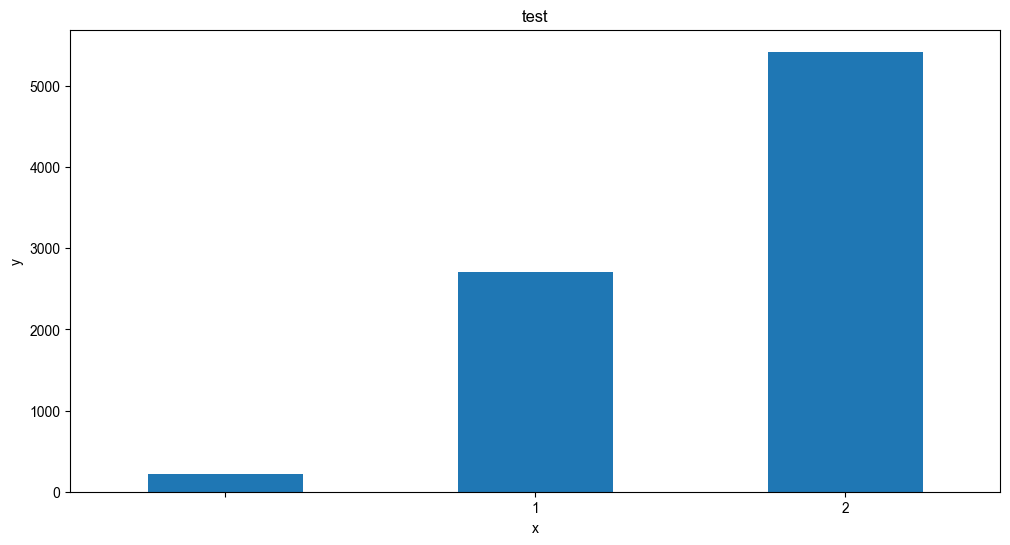

In [49]:
merged_notna_df['p21i02004'].unique
marry_counts = merged_notna_df['p21i02004'].value_counts().sort_index()

plt.figure(figsize=(12, 6))  # 그래프 크기 설정
marry_counts.plot(kind='bar')
plt.xlabel('x')
plt.ylabel('y')
plt.title('test')
plt.xticks(rotation=0)  # x축 라벨 회전
plt.show()

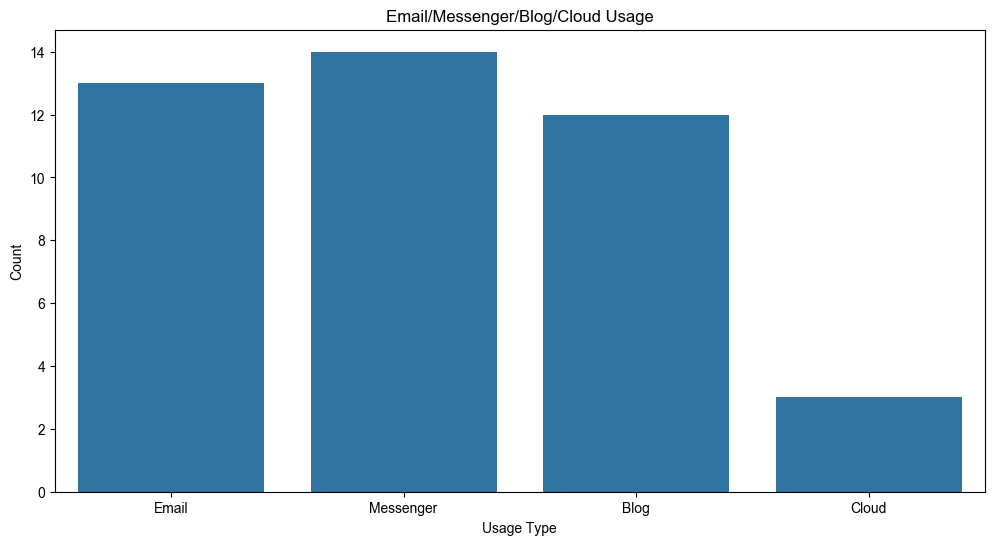

In [50]:
# 문5 - 이메일, 메신저, 블로그, 클라우드 등 (p21c05001, p21c05002, p21c05039, p21c05051)
# 수정 필요                           (p21d08001, p21d22001, p21d10001, p21d12001)

# 사용 유형(Usage Type) 컬럼 지정 (예: p21c05001)
usage_col = "p21c05001"

# 숫자로 변환 (문자열 섞인 데이터 처리)
merged_notna_df.loc[:, usage_col] = pd.to_numeric(merged_notna_df[usage_col], errors='coerce')

# NaN 값 제거
df = merged_notna_df.dropna(subset=[usage_col])

# 정수형 변환 (X축을 정렬하기 위해)
df.loc[:, usage_col] = df[usage_col].astype(int)

# 숫자 값과 카테고리 매핑
usage_mapping = {1: "Email", 2: "Messenger", 3: "Blog", 4: "Cloud"}
df = df[df[usage_col].isin(usage_mapping.keys())]  # 필요한 값만 필터링
df["Usage Type"] = df[usage_col].map(usage_mapping)

# 데이터 정렬 후 그래프 생성
plt.figure(figsize=(12, 6))
sns.countplot(x=pd.Categorical(df["Usage Type"], categories=usage_mapping.values(), ordered=True))
plt.title("Email/Messenger/Blog/Cloud Usage")
plt.xlabel("Usage Type")
plt.ylabel("Count")
plt.show()

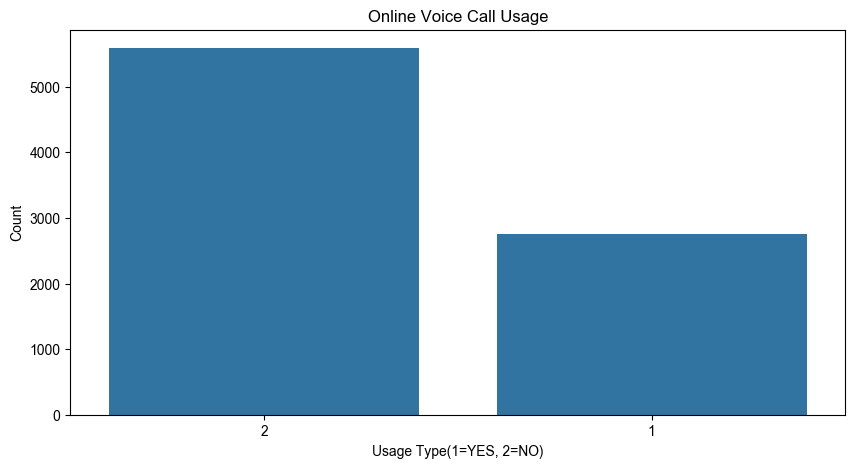

In [51]:
# 온라인 음성통화 사용 여부 ('p21a03032') 
# 수정 필요             (p21a03032)

# `p21a03032` 값 2를 0으로 변경
merged_notna_df.loc[:, 'p21a03032'] = merged_notna_df['p21a03032'].replace(2, 0)
plt.figure(figsize=(10, 5))
sns.countplot(x=merged_notna_df['p21a03032'].dropna())
plt.title("Online Voice Call Usage")
plt.xlabel("Usage Type(1=YES, 2=NO)")
plt.ylabel("Count")
plt.show()

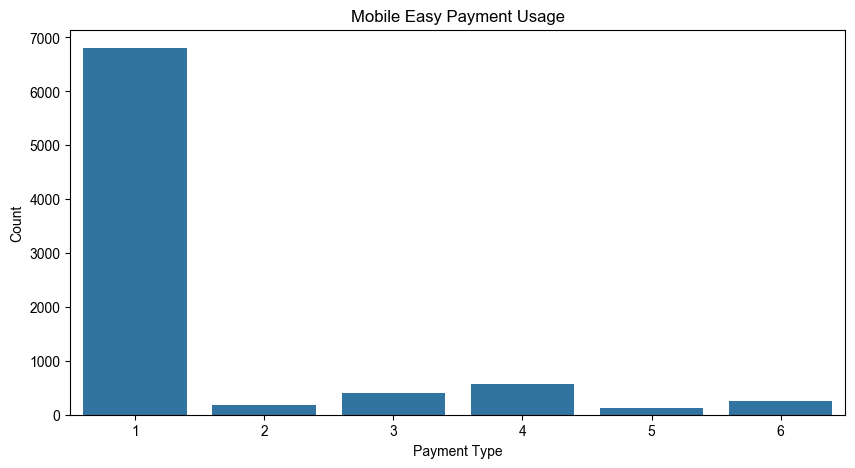

In [52]:
# 모바일 간편 송금 및 신용카드 저장 (`p21d14001`, `p21d14002`)
plt.figure(figsize=(10, 5))
sns.countplot(x=merged_notna_df["p21d14001"].dropna())
plt.title("Mobile Easy Payment Usage")
plt.xlabel("Payment Type")
plt.ylabel("Count")
plt.show()

/var/folders/kp/5_0zhw410tzf9tkb2lt76sw40000gn/T/ipykernel_7900/728984489.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Yes - <12 times/year' 'No Card Stored' nan ... 'No Mobile Payment'
 'No Mobile Payment' 'No Mobile Payment']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged_notna_df.loc[:, mobile_payment_col] = merged_notna_df[mobile_payment_col].map(payment_labels)
/var/folders/kp/5_0zhw410tzf9tkb2lt76sw40000gn/T/ipykernel_7900/728984489.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Yes - <12 times/year' 'No Card Stored' nan ... 'No Mobile Payment'
 'No Mobile Payment' 'No Mobile Payment']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged_notna_df.loc[:, credit_card_col] = merged_notna_df[credit_card_col].map(payment_labels)


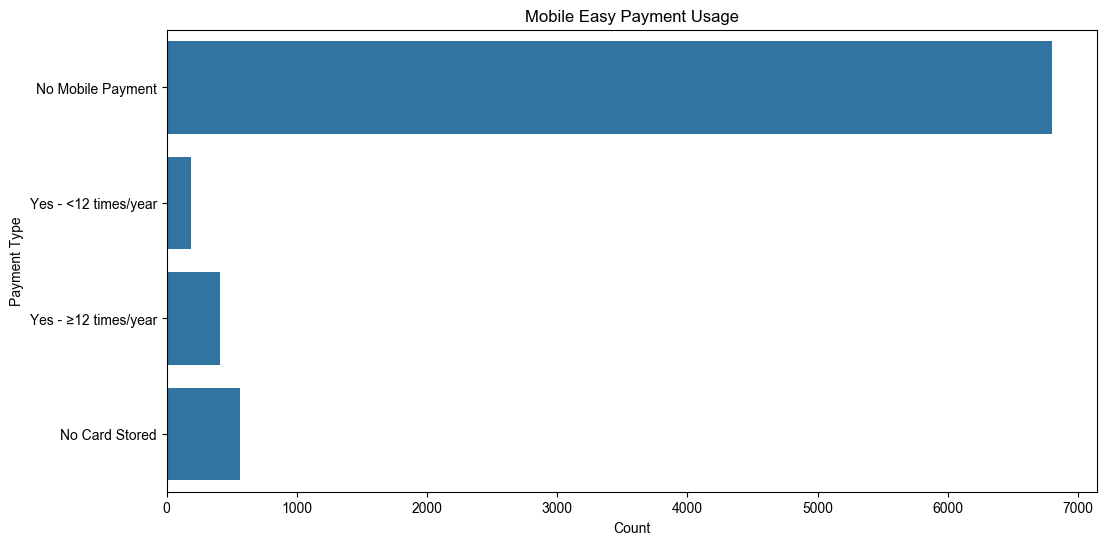

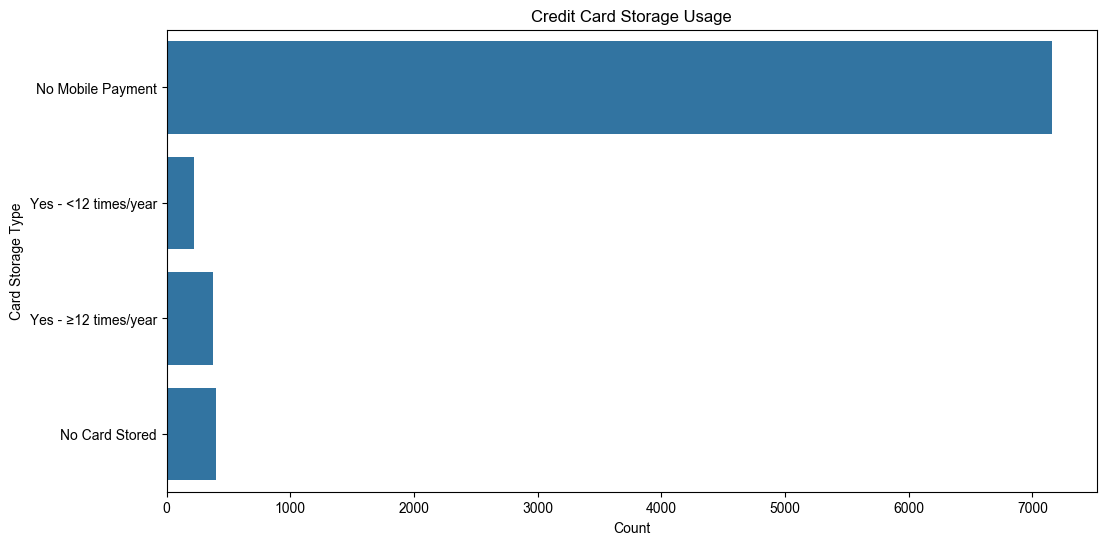

In [53]:
# 간편 송금 및 신용카드 저장 컬럼 선택
mobile_payment_col = "p21d14001"  # 모바일 간편 송금
credit_card_col = "p21d14002"  # 신용카드 저장

# 응답 값 의미 매핑
payment_labels = {
    1: "No Mobile Payment",
    2: "Yes - <12 times/year",
    3: "Yes - ≥12 times/year",
    4: "No Card Stored"
}

# 값 변환
merged_notna_df.loc[:, mobile_payment_col] = merged_notna_df[mobile_payment_col].map(payment_labels)
merged_notna_df.loc[:, credit_card_col] = merged_notna_df[credit_card_col].map(payment_labels)

#  모바일 간편 송금 사용 현황 시각화
plt.figure(figsize=(12, 6))
sns.countplot(y=merged_notna_df[mobile_payment_col].dropna(), order=payment_labels.values())  # Y축으로 표현하여 가독성 증가
plt.title("Mobile Easy Payment Usage")
plt.xlabel("Count")
plt.ylabel("Payment Type")
plt.show()

#  신용카드 저장 여부 시각화
plt.figure(figsize=(12, 6))
sns.countplot(y=merged_notna_df[credit_card_col].dropna(), order=payment_labels.values())  # Y축으로 표현하여 가독성 증가
plt.title("Credit Card Storage Usage")
plt.xlabel("Count")
plt.ylabel("Card Storage Type")
plt.show()

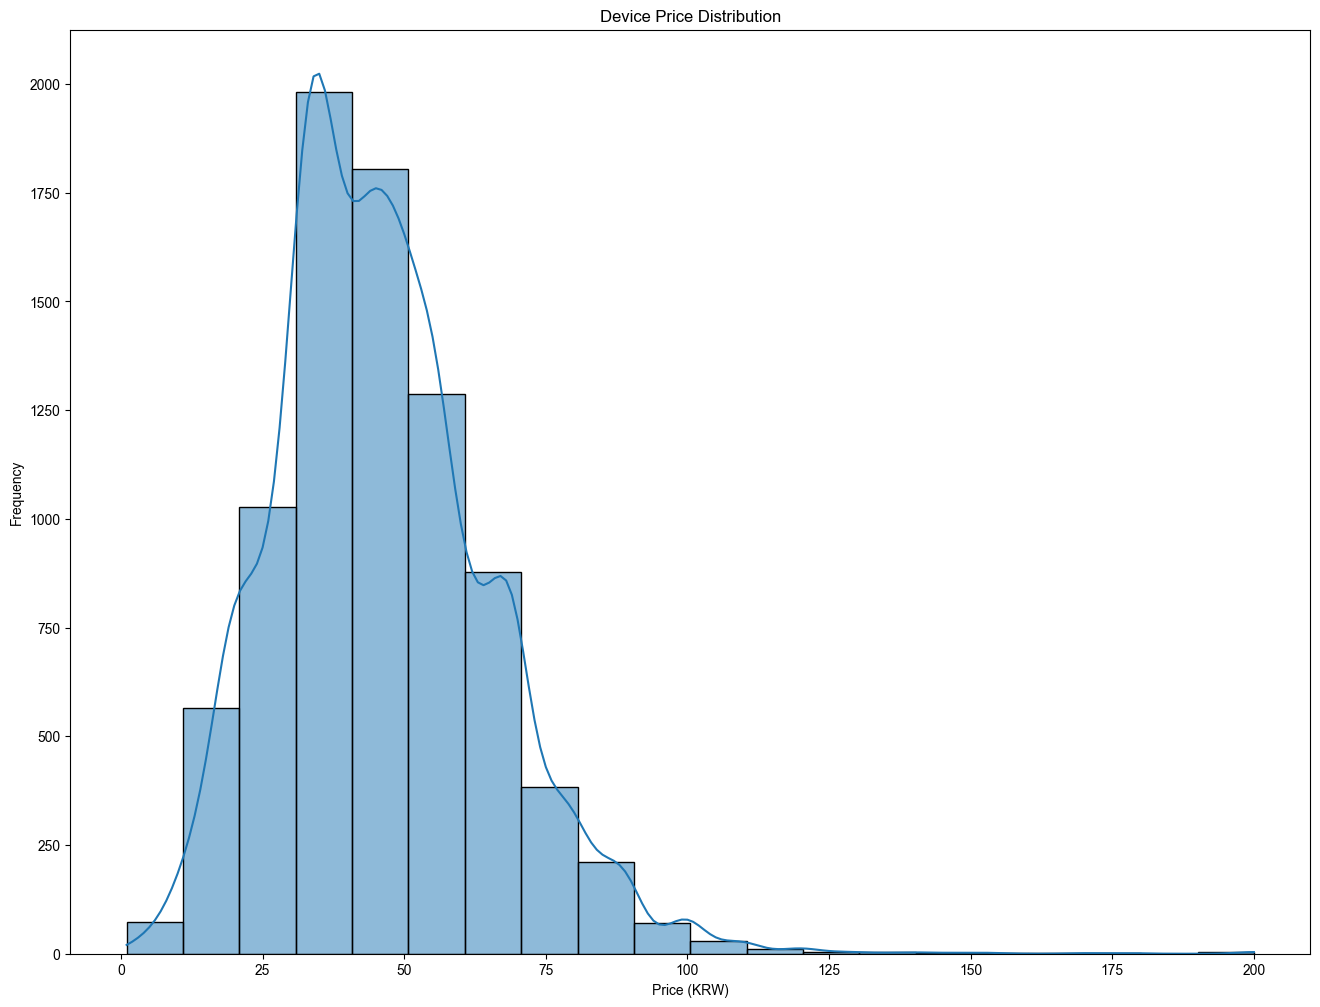

In [54]:
merged_notna_df.loc[:, 'p21c01001'] = pd.to_numeric(merged_notna_df['p21c01001'], errors='coerce')

### 통신사 가격 (문15-1) (p21c01001)
plt.figure(figsize=(16, 12))
sns.histplot(merged_notna_df["p21c01001"].dropna(), bins=20, kde=True)
plt.title("Device Price Distribution")
plt.xlabel("Price (KRW)")
plt.ylabel("Frequency")
plt.xticks(rotation=0) 
plt.show()

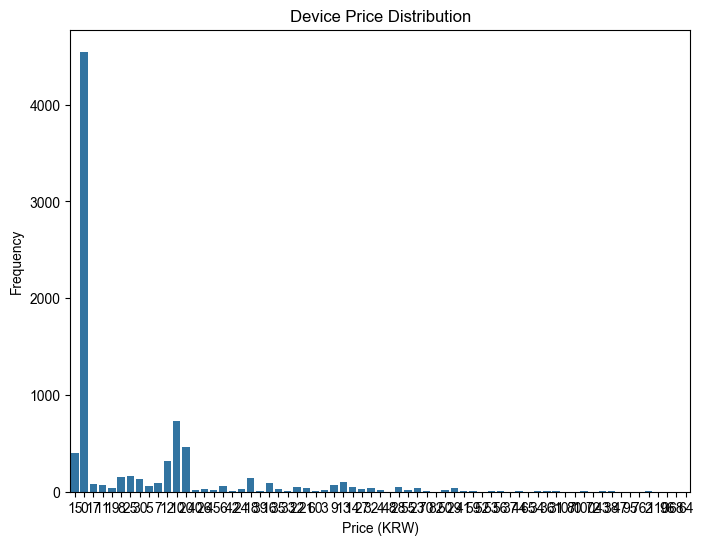

In [55]:
###  기기 가격 (문15-2) (p21c01003)
plt.figure(figsize=(8, 6))
sns.countplot(x=merged_notna_df["p21c01003"].dropna())
plt.title("Device Price Distribution")
plt.xlabel("Price (KRW)")
plt.ylabel("Frequency")
plt.xticks(rotation=0)  
plt.show()

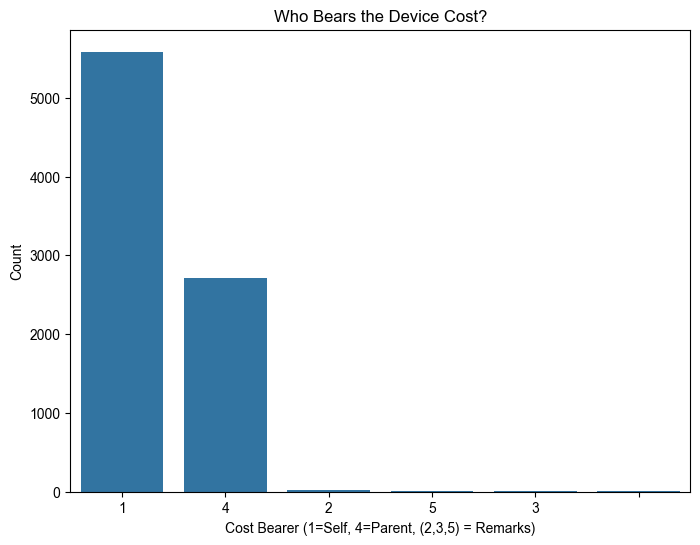

In [56]:
###  가격 부담 (부모 or 자신) (문17) (p22c02001)
plt.figure(figsize=(8, 6))
sns.countplot(x=merged_notna_df["p22c02001"].dropna())
plt.title("Who Bears the Device Cost?")
plt.xlabel("Cost Bearer (1=Self, 4=Parent, (2,3,5) = Remarks)")
plt.ylabel("Count")
plt.show()

---
### phone 문항 (26번)
- 15 스마트폰 구분 (데이터 구별)    p21a03002
- 16 스마트폰 DMB 기능           p21a03004
- 17 스마트폰 통신사              p21a03008
- 18-1 음성 무제한 서비스 유무     p21a03024
- 18-2 데이터 무제한 서비스 유무    p21a03026
- 20 스마트폰 사용 기간           p21a03038
- 21 스마트폰 제조사              p21a03028


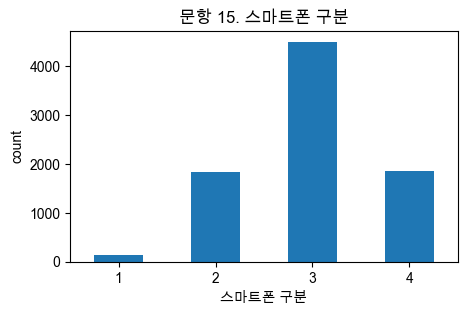

In [57]:
# 15 p__a03002 스마트폰 구분 (1~4)
# [휴대폰 및 스마트 기기 보유 및 이용 현황] 스마트폰 구분 - 스마트폰 1
# ① 3G 스마트폰 
# ② LTE 스마트폰
# ③ LTE-A 스마트폰
# ④ 5G 스마트폰

merged_notna_df['p21a03002']
n_15_counts_21 = merged_notna_df['p21a03002'].value_counts().sort_index()

plt.figure(figsize=(5, 3))
n_15_counts_21.plot(kind='bar')
plt.xlabel('스마트폰 구분')
plt.ylabel('count')
plt.title('문항 15. 스마트폰 구분')
plt.xticks(rotation=0)
plt.show()

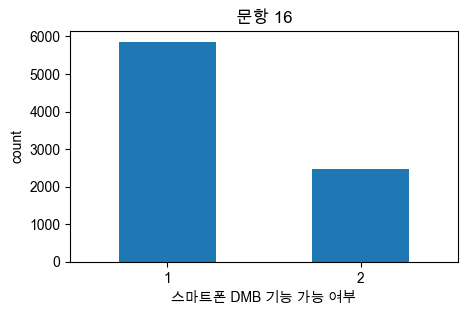

In [58]:
# 16 지상파 DMB (DMB 유무)
# [휴대폰 및 스마트 기기 보유 및 이용 현황] 스마트폰 지상파 DMB 기능 가능 여부 - 스마트폰 1
# 1: 있음, 2: 없음 

n_16_counts_21 = merged_notna_df['p21a03004'].value_counts().sort_index()
plt.figure(figsize=(5, 3))
n_16_counts_21.plot(kind='bar')
plt.xlabel('스마트폰 DMB 기능 가능 여부')
plt.ylabel('count')
plt.title('문항 16')
plt.xticks(rotation=0)
plt.show()

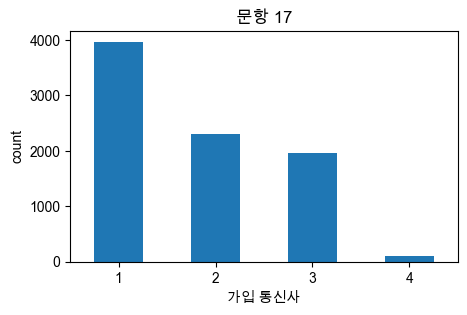

In [59]:
# 17 가입한 통신사 (1~4)
# [휴대폰 및 스마트 기기 보유 및 이용 현황] 스마트폰 가입 이동 통신사 - 스마트폰 1
# ① SKT
# ② KT(구 KTF)
# ③ LG U⁺(구 LGT)
# ④ 알뜰폰 서비스(MVNO)
# 예) LG헬로비전(구 CJ헬로모바일), 리브엠 등 

n_17_counts_21 = merged_notna_df['p21a03008'].value_counts().sort_index()

plt.figure(figsize=(5, 3))
n_17_counts_21.plot(kind='bar')
plt.xlabel('가입 통신사')
plt.ylabel('count')
plt.title('문항 17')
plt.xticks(rotation=0)
plt.show()

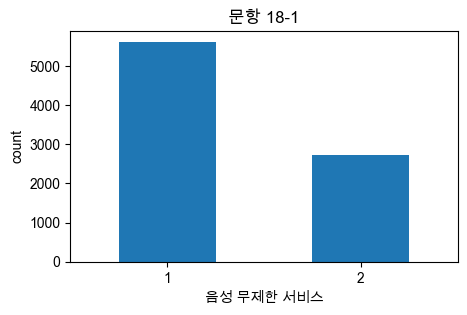

In [60]:
# 18-1 음성 무제한 서비스 (서비스 유무)
n_18_1_counts_21 = merged_notna_df['p21a03024'].value_counts().sort_index()

plt.figure(figsize=(5, 3))
n_18_1_counts_21.plot(kind='bar')
plt.xlabel('음성 무제한 서비스')
plt.ylabel('count')
plt.title('문항 18-1')
plt.xticks(rotation=0)
plt.show()

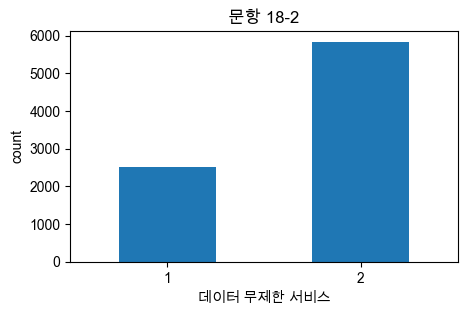

In [61]:
# 18-2 데이터 무제한 서비스 (서비스 유무)

n_18_2_counts_21 = merged_notna_df['p21a03026'].value_counts().sort_index()

plt.figure(figsize=(5, 3))
n_18_2_counts_21.plot(kind='bar')
plt.xlabel('데이터 무제한 서비스')
plt.ylabel('count')
plt.title('문항 18-2')
plt.xticks(rotation=0)
plt.show()

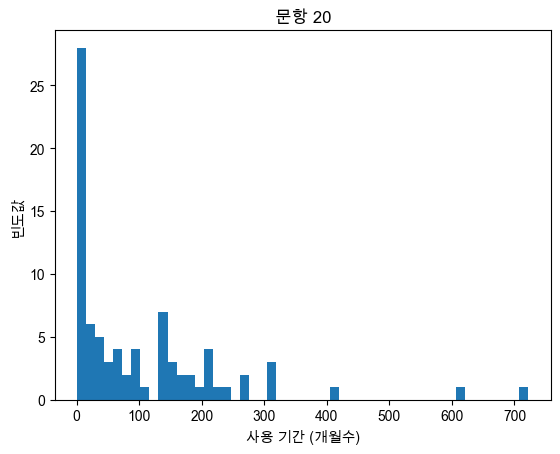

In [62]:
# 20 사용 기간 (날짜를 int로 받아옴)
# p__a03038
n_20_counts_21 = merged_notna_df['p21a03038'].value_counts().sort_index()

plt.hist(n_20_counts_21, bins=50)
plt.xlabel('사용 기간 (개월수)')
plt.ylabel('빈도값')
plt.title('문항 20')
plt.show()

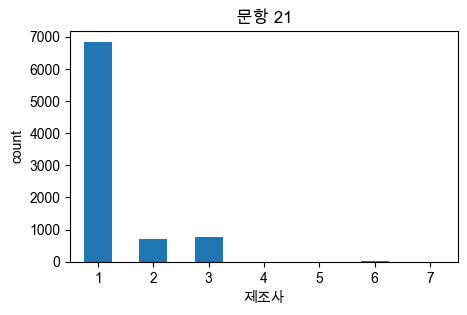

In [63]:
# 21 제조사 (row 값) 
# p__a03028

n_21_counts_21 = merged_notna_df['p21a03028'].value_counts().sort_index()
plt.figure(figsize=(5, 3))
n_21_counts_21.plot(kind='bar')
plt.xlabel('제조사')
plt.ylabel('count')
plt.title('문항 21')
plt.xticks(rotation=0)
plt.show()

---
### 개인정보 문항
- ?? 나이                       p21age
- 35 최종 학력 (학교별로 0~6)      p21school1
- 37 혼인 유무 (1~4)             p21mar
- 38 월평균 소득 (평균 소득 1~18)   p21income1
- 39 직업 유무 (직업 유무)         p21job1
- 40 종교 유무 (종교 유무)         p21relig1

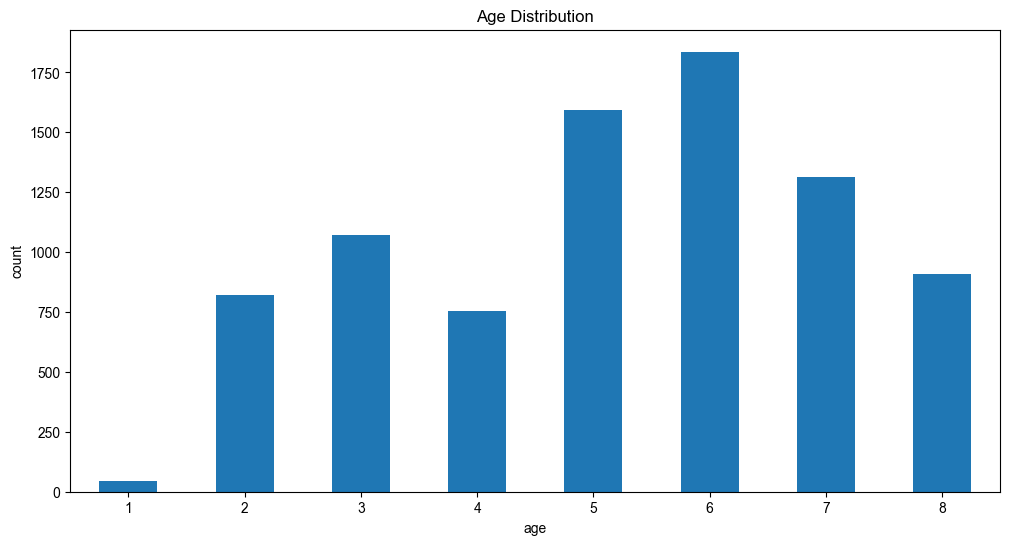

In [64]:
age_counts = merged_notna_df['p21age'].value_counts().sort_index()

plt.figure(figsize=(12, 6))  # 그래프 크기 설정
age_counts.plot(kind='bar')
plt.xlabel('age')
plt.ylabel('count')
plt.title('Age Distribution')
plt.xticks(rotation=0)  # x축 라벨 회전
plt.show()


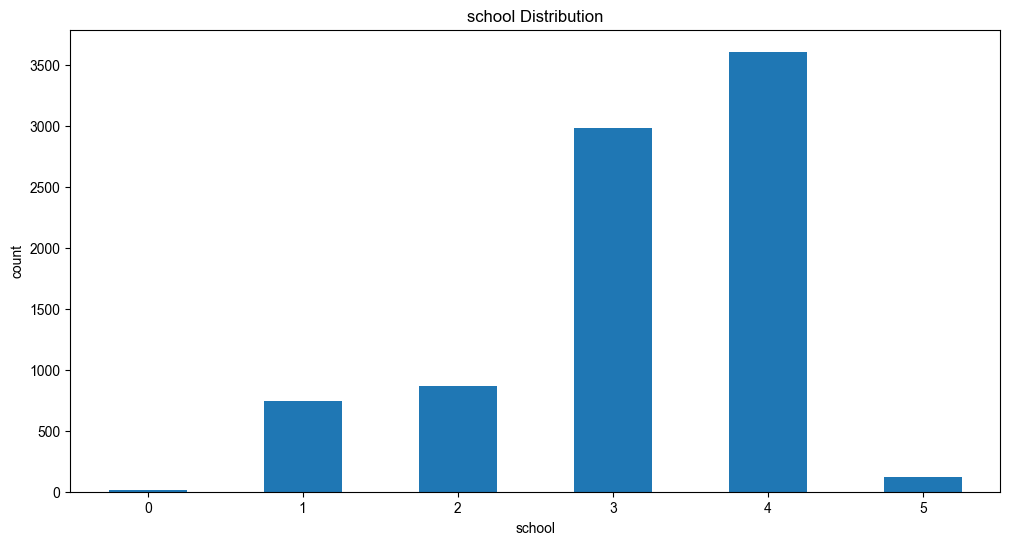

In [65]:
merged_notna_df['p21school1']
school_counts = merged_notna_df['p21school1'].value_counts().sort_index()

plt.figure(figsize=(12, 6))  # 그래프 크기 설정
school_counts.plot(kind='bar')
plt.xlabel('school')
plt.ylabel('count')
plt.title('school Distribution')
plt.xticks(rotation=0)  # x축 라벨 회전
plt.show()


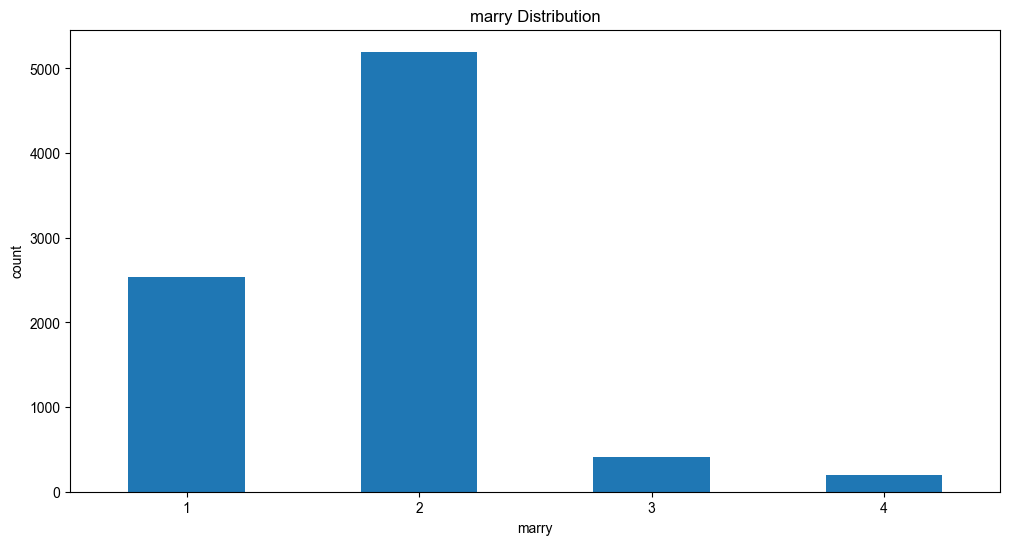

In [66]:
merged_notna_df['p21mar']
marry_counts = merged_notna_df['p21mar'].value_counts().sort_index()

plt.figure(figsize=(12, 6))  # 그래프 크기 설정
marry_counts.plot(kind='bar')
plt.xlabel('marry')
plt.ylabel('count')
plt.title('marry Distribution')
plt.xticks(rotation=0)  # x축 라벨 회전
plt.show()

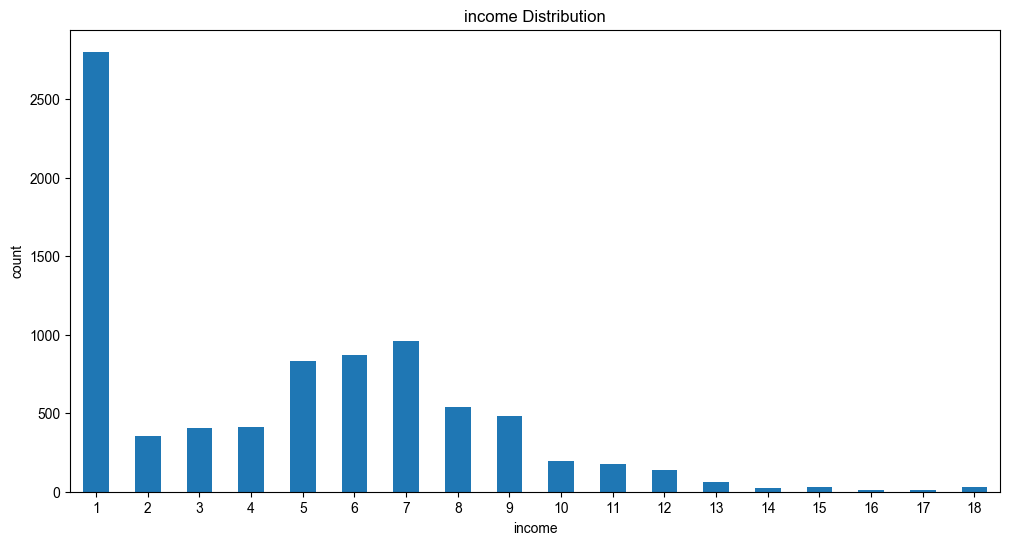

In [67]:
merged_notna_df['p21income1']
income_counts = merged_notna_df['p21income1'].value_counts().sort_index()

plt.figure(figsize=(12, 6))  # 그래프 크기 설정
income_counts.plot(kind='bar')
plt.xlabel('income')
plt.ylabel('count')
plt.title('income Distribution')
plt.xticks(rotation=0)  # x축 라벨 회전
plt.show()

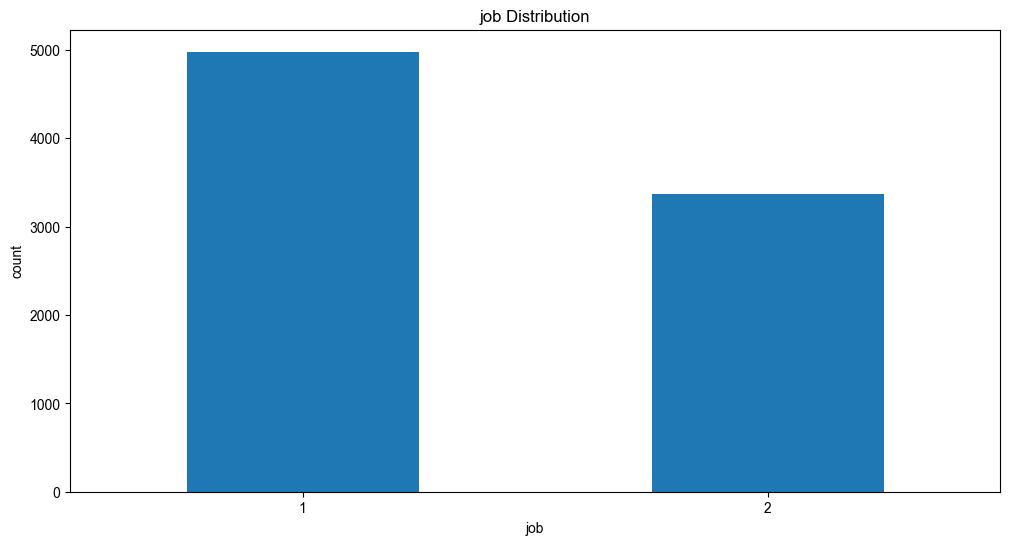

In [68]:
merged_notna_df['p21job1']
job_counts = merged_notna_df['p21job1'].value_counts().sort_index()

plt.figure(figsize=(12, 6))  # 그래프 크기 설정
job_counts.plot(kind='bar')
plt.xlabel('job')
plt.ylabel('count')
plt.title('job Distribution')
plt.xticks(rotation=0)  # x축 라벨 회전
plt.show()

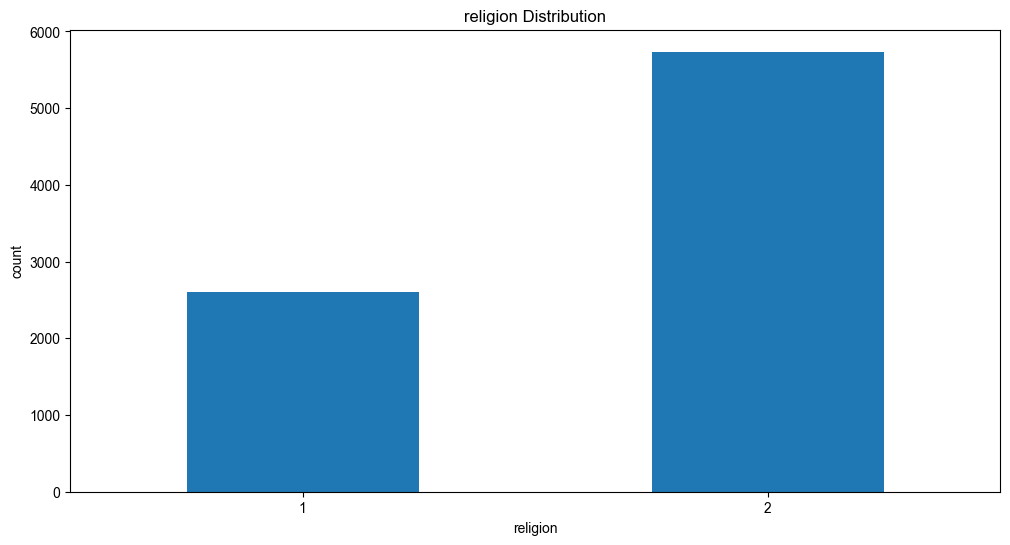

In [69]:
merged_notna_df['p21relig1']
relig_counts = merged_notna_df['p21relig1'].value_counts().sort_index()

plt.figure(figsize=(12, 6))  # 그래프 크기 설정
relig_counts.plot(kind='bar')
plt.xlabel('religion')
plt.ylabel('count')
plt.title('religion Distribution')
plt.xticks(rotation=0)  # x축 라벨 회전
plt.show()

---
### 각 컬럼 명 변경 & csv 파일 생성

- 5 - 이메일, 메신저, 블로그, 클라우드 사용 여부
    - 이메일                        p21d08001      ->   email
    - 메신저                        p21d22001      ->   messenger
    - 블로그                        p21d10001      ->   blog
    - 클라우드                      p21d12001      ->   cloud
- 6 - 온라인 음성통화 여부             p21a03032      ->   call_check   
- 10 - 1년간 서비스 구매 이용 채널      p21i01001      ->   service_purchase
- 14 - 모바일 간편 송금 및 신용카드 저장 여부                               
    - 모바일 간편 송금               p21i02001      ->   money_transfer
    - 신용카드 저장  (모바일에 신용카드 저장)p21i02004   ->   cradit_card
- 15 - 가격(Max 4자리 int)      
    - 통신사 가격                   p21c01001      ->   agency_purchase
    - 기기 가격                     p21c01003      ->    machine_purchase
- 17 - 가격 부담(부모 or 자신)       p22c02001       ->   phone_owner

- 5 - 이메일, 메신저, 블로그, 클라우드 사용 여부
    - 이메일                        p21c05001    ->   email
    - 메신저                        p21c05002    ->   messenger
    - 블로그                        p21c05039    ->   blog
    - 클라우드                      p21c05051    ->   cloud
- 6 - 온라인 음성통화 여부 →            p21c06006   ->   call_check   
- 10 - 1년간 서비스 구매 이용 채널 →     p21d10001   ->   service_purchase
- 12 - 라이브 커머스 구매 경험 →        p21d12001   ->    live_commerce
- 14 - 모바일 간편 송금 및 신용카드 저장 여부
    - 모바일 간편 송금               p21d14001     ->   money_transfer
    - 신용카드 저장                  p21d14002    ->   cradit_card
- 15 - 가격(Max 4자리 int)→      
    - 통신사 가격                   p21c01001    ->   agency_purchase
    - 기기 가격                     p21c01003   ->    machine_purchase
- 17 - 가격 부담(부모 or 자신)→       p22c02001    ->   phone_owner
- 26 스마트폰
    - 15 스마트폰 구분 (데이터 구별)    p21a03002   ->    data
    - 16 스마트폰 DMB 기능           p21a03004   ->    dmb
    - 17 스마트폰 통신사              p21a03008   ->    agency
    - 18-1 음성 무제한 서비스 유무     p21a03024    ->    voice_service
    - 18-2 데이터 무제한 서비스 유무    p21a03026   ->    data_service
    - 20 스마트폰 사용 기간           p21a03038    ->   use_date
    - 21 스마트폰 제조사              p21a03028   ->    brand
- ?? 나이                          p21age      ->    age
- 35 최종 학력 (학교별로 0~6)         p21school1   ->   school
- 37 혼인 유무 (1~4)                p21mar       ->   marry
- 38 월평균 소득 (평균 소득 1~18)      p21income1  ->    salary
- 39 직업 유무 (직업 유무)            p21job1      ->   job
- 40 종교 유무 (종교 유무)            p21relig1    ->   religion

In [70]:
# merged_notna_df[['p21d08001', 'p21d22001', 'p21d10001', 'p21d12001', 'p21a03032', 
#                  'p21i01001', 'p21i02001', 'p21i02004', 'p21c01001', 
#                  'p21c01003', 'p22c02001', 'p21a03002', 'p21a03004', 'p21a03008',
#                  'p21a03024', 'p21a03026', 'p21a03038', 'p21a03028', 'p21age', 
#                  'p21school1', 'p21mar', 'p21income1', 'p21job1', 'p21relig1']] = merged_notna_df[[
#                      'email', 'messenger', 'blog', 'cloud', 'call_check', 
#                      'service_purchase', 'money_transfer', 'cradit_card', 'agency_purchase', 
#                      'machine_purchase', 'phone_owner', 'data', 'dmb', 'agency', 
#                      'voice_service', 'data_service', 'use_date', 'brand', 'age', 
#                      'school', 'marry', 'salary', 'job', 'religion']]


# 필요한 원본 컬럼들과 새로운 컬럼명을 매핑
columns_mapping = {
   # 2021년 컬럼
   'p21d08001': 'email_21', 
   'p21d22001': 'messenger_21',
   'p21d10001': 'blog_21',
   'p21d12001': 'cloud_21',
   'p21a03032': 'call_check_21',
   'p21i01001': 'service_purchase_21',
   'p21i02001': 'money_transfer_21',
   'p21i02004': 'credit_card_21',
   'p21c01001': 'agency_purchase_21',
   'p21c01003': 'machine_purchase_21',
   'p21c02001': 'phone_owner_21',  # 수정된 부분
   'p21a03002': 'data_21',
   'p21a03004': 'dmb_21',
   'p21a03008': 'agency_21',
   'p21a03024': 'voice_service_21',
   'p21a03026': 'data_service_21',
   'p21a03038': 'use_date_21',
   'p21a03028': 'brand_21',
   'p21age': 'age_21',
   'p21school1': 'school_21',
   'p21mar': 'marry_21',
   'p21income1': 'salary_21',
   'p21job1': 'job_21',
   'p21relig1': 'religion_21',

   # 2022년 컬럼
   'p22d08001': 'email_22',
   'p22d22001': 'messenger_22',
   'p22d10001': 'blog_22',
   'p22d12001': 'cloud_22',
   'p22a03032': 'call_check_22',
   'p22i01001': 'service_purchase_22',
   'p22i02001': 'money_transfer_22',
   'p22i02004': 'credit_card_22',
   'p22c01001': 'agency_purchase_22',
   'p22c01003': 'machine_purchase_22',
   'p22c02001': 'phone_owner_22',
   'p22a03002': 'data_22',
   'p22a03004': 'dmb_22',
   'p22a03008': 'agency_22',
   'p22a03024': 'voice_service_22',
   'p22a03026': 'data_service_22',
   'p22a03038': 'use_date_22',
   'p22a03028': 'brand_22',
   'p22age': 'age_22',
   'p22school1': 'school_22',
   'p22mar': 'marry_22',
   'p22income1': 'salary_22',
   'p22job1': 'job_22',
   'p22relig1': 'religion_22',

   # 2023년 컬럼
   'p23d08001': 'email_23',
   'p23d22001': 'messenger_23',
   'p23d10001': 'blog_23',
   'p23d12001': 'cloud_23',
   'p23a03032': 'call_check_23',
   'p23i01001': 'service_purchase_23',
   'p23i02001': 'money_transfer_23',
   'p23i02004': 'credit_card_23',
   'p23c01001': 'agency_purchase_23',
   'p23c01003': 'machine_purchase_23',
   'p23c02001': 'phone_owner_23',
   'p23a03002': 'data_23',
   'p23a03004': 'dmb_23',
   'p23a03008': 'agency_23',
   'p23a03024': 'voice_service_23',
   'p23a03026': 'data_service_23',
   'p23a03038': 'use_date_23',
   'p23a03028': 'brand_23',
   'p23age': 'age_23',
   'p23school1': 'school_23',
   'p23mar': 'marry_23',
   'p23income1': 'salary_23',
   'p23job1': 'job_23',
   'p23relig1': 'religion_23'
}

# pid와 매핑된 컬럼들만 선택하고 이름 변경
merged_notna_df = merged_notna_df[['pid'] + list(columns_mapping.keys())].rename(columns=columns_mapping)

# 결과 확인
print("최종 컬럼 수:", len(merged_notna_df.columns))
print("\n최종 컬럼 목록:")
print(merged_notna_df.columns.tolist())

최종 컬럼 수: 73

최종 컬럼 목록:
['pid', 'email_21', 'messenger_21', 'blog_21', 'cloud_21', 'call_check_21', 'service_purchase_21', 'money_transfer_21', 'credit_card_21', 'agency_purchase_21', 'machine_purchase_21', 'phone_owner_21', 'data_21', 'dmb_21', 'agency_21', 'voice_service_21', 'data_service_21', 'use_date_21', 'brand_21', 'age_21', 'school_21', 'marry_21', 'salary_21', 'job_21', 'religion_21', 'email_22', 'messenger_22', 'blog_22', 'cloud_22', 'call_check_22', 'service_purchase_22', 'money_transfer_22', 'credit_card_22', 'agency_purchase_22', 'machine_purchase_22', 'phone_owner_22', 'data_22', 'dmb_22', 'agency_22', 'voice_service_22', 'data_service_22', 'use_date_22', 'brand_22', 'age_22', 'school_22', 'marry_22', 'salary_22', 'job_22', 'religion_22', 'email_23', 'messenger_23', 'blog_23', 'cloud_23', 'call_check_23', 'service_purchase_23', 'money_transfer_23', 'credit_card_23', 'agency_purchase_23', 'machine_purchase_23', 'phone_owner_23', 'data_23', 'dmb_23', 'agency_23', 'voice_ser

In [71]:
# CSV 파일로 저장 (인덱스는 제외)
merged_notna_df.to_csv('./data/phone_information.csv', index=False)

# 저장 확인
print("파일이 성공적으로 저장되었습니다.")
print(f"저장된 행 수: {len(merged_notna_df)}")
print(f"저장된 컬럼 수: {len(merged_notna_df.columns)}")

파일이 성공적으로 저장되었습니다.
저장된 행 수: 8342
저장된 컬럼 수: 73


---

In [72]:
# 시각화 자료로 년도별 제조사 확인

# CSV 파일 읽기
phone_df = pd.read_csv('./data/phone_information.csv', low_memory=False)

# 3년간 삼성을 쓰지 않는 고객 제거

phone_df = phone_df[(phone_df['brand_22'] == '1') | 
                    (phone_df['brand_23'] == '1') ]

print("\n삼성을 쓰지 않는 사람 제거 후 데이터 크기:", phone_df.shape)

# object 타입인 컬럼들 찾기
object_columns = phone_df.select_dtypes(include=['object']).columns

# object 타입 컬럼들을 숫자형으로 변환
for col in object_columns:
    phone_df.loc[:, col] = pd.to_numeric(phone_df[col], errors='coerce').astype('Int64')

# 변환된 컬럼 수 확인
print(f"\n변환된 컬럼 수: {len(object_columns)}개")
print("변환된 컬럼:", list(object_columns))

# NA값이 있는 컬럼들 확인

na_columns = phone_df.columns[phone_df.isna().any()].tolist()
print("NA가 있는 컬럼들:")
for col in na_columns:
    na_count = phone_df[col].isna().sum()
    print(f"{col}: {na_count}개의 NA")
    print()

print("\n전체 NA 제거 전 데이터 크기:", phone_df.shape)

# 방법 1: NA가 있는 행을 모두 제거
phone_df = phone_df.dropna()
print("\n전체 NA 제거 후 데이터 크기:", phone_df.shape)


삼성을 쓰지 않는 사람 제거 후 데이터 크기: (7607, 73)



변환된 컬럼 수: 31개
변환된 컬럼: ['service_purchase_21', 'money_transfer_21', 'credit_card_21', 'call_check_22', 'service_purchase_22', 'money_transfer_22', 'credit_card_22', 'agency_purchase_22', 'machine_purchase_22', 'phone_owner_22', 'data_22', 'dmb_22', 'agency_22', 'voice_service_22', 'data_service_22', 'use_date_22', 'brand_22', 'call_check_23', 'service_purchase_23', 'money_transfer_23', 'credit_card_23', 'agency_purchase_23', 'machine_purchase_23', 'phone_owner_23', 'data_23', 'dmb_23', 'agency_23', 'voice_service_23', 'data_service_23', 'use_date_23', 'brand_23']
NA가 있는 컬럼들:
service_purchase_21: 191개의 NA

money_transfer_21: 191개의 NA

credit_card_21: 191개의 NA

call_check_22: 20개의 NA

service_purchase_22: 136개의 NA

money_transfer_22: 136개의 NA

credit_card_22: 136개의 NA

agency_purchase_22: 4개의 NA

machine_purchase_22: 4개의 NA

phone_owner_22: 4개의 NA

data_22: 20개의 NA

dmb_22: 20개의 NA

agency_22: 20개의 NA

voice_service_22: 20개의 NA

data_service_22: 20개의 NA

use_date_22: 20개의 NA

brand_22: 2

In [73]:
# CSV 파일로 저장 (인덱스는 제외)
phone_df.to_csv('./data/phone_information.csv', index=False)

# 저장 확인
print("파일이 성공적으로 저장되었습니다.")
print(f"저장된 행 수: {len(phone_df)}")
print(f"저장된 컬럼 수: {len(phone_df.columns)}")

파일이 성공적으로 저장되었습니다.
저장된 행 수: 7390
저장된 컬럼 수: 73


In [74]:
# 폰트 한글화 세팅

# # window font setting
# font_path = 'C:/Windows/Fonts/batang.ttc'           # 한글 폰트를 적용하여 시각화

# # PJE font setting
plt.rcParams['font.family'] = 'Malgun Gothic' 

# mac font setting
#font_path = '/Library/Fonts/Arial Unicode.ttf'
#font = fm.FontProperties(fname=font_path).get_name()
#matplotlib.rc('font', family=font)

### 컬럼명 정리 (21, 22, 23)

| 원본 컬럼명                     | 정리된 컬럼명        |
|---------------------------------|-------------------|
| 고객 고유 번호                | pid                 |
| 스마트폰 제조사                | brand               |
| 이메일                          | email               |
| 메신저                          | messenger           |
| 블로그                          | blog                |
| 클라우드                        | cloud               |
| 온라인 음성통화 여부               | call_check          |
| 년간 서비스 구매 이용 채널          | service_purchase    |
| 모바일 간편 송금                  | money_transfer      |
| 신용카드 저장 (모바일에 신용카드 저장) | credit_card       |
| 통신사 가격                      | agency_purchase     |
| 기기 가격                       | machine_purchase    |
| 가격 부담(부모 or 자신)           | phone_owner         |
| 스마트폰 구분 (데이터 구별)      | data                |
| 스마트폰 DMB 기능             | dmb                 |
| 스마트폰 통신사                | agency              |
| 음성 무제한 서비스 유무        | voice_service       |
| 데이터 무제한 서비스 유무      | data_service        |
| 스마트폰 사용 기간             | use_date            |
| 나이                        | age                 |
| 최종 학력 (학교별로 0~6)        | school              |
| 혼인 유무 (1~4)              | marry               |
| 월평균 소득 (평균 소득 1~18)    | salary              |
| 직업 유무 (직업 유무)          | job                 |
| 종교 유무 (종교 유무)          | religion            |

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/var/folders/kp/5_0zhw410tzf9tkb2lt76sw40000gn/T/ipykernel_7900/912124021.py:34: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/kp/5_0zhw410tzf9tkb2lt76sw40000gn/T/ipykernel_7900/912124021.py:34: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/kp/5_0zhw410tzf9tkb2lt76sw40000gn/T/ipykernel_7900/912124021.py:34: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
f

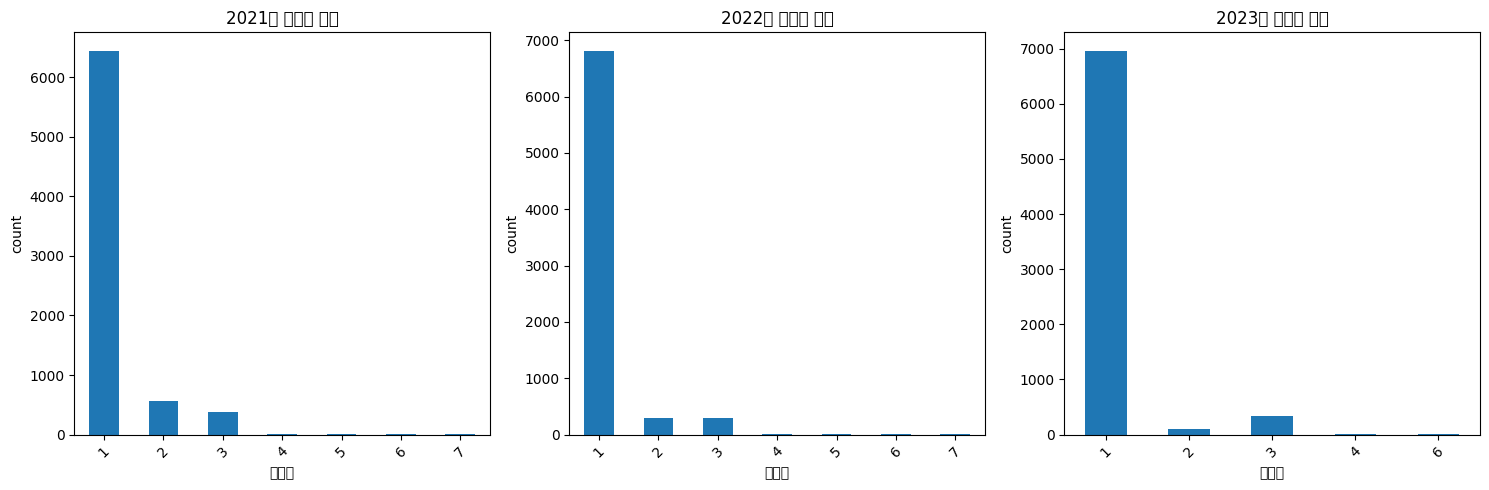

In [75]:
# 시각화 자료로 년도별 제조사 확인

# CSV 파일 읽기
phone_df = pd.read_csv('./data/phone_information.csv', low_memory=False)


# 서브플롯 생성
plt.figure(figsize=(15, 5))

# 2021년 데이터
plt.subplot(1, 3, 1)
phone_df['brand_21'].value_counts().sort_index().plot(kind='bar')
plt.title('2021년 제조사 분포')
plt.xlabel('제조사')
plt.ylabel('count')
plt.xticks(rotation=45)

# 2022년 데이터
plt.subplot(1, 3, 2)
phone_df['brand_22'].value_counts().sort_index().plot(kind='bar')
plt.title('2022년 제조사 분포')
plt.xlabel('제조사')
plt.ylabel('count')
plt.xticks(rotation=45)

# 2023년 데이터
plt.subplot(1, 3, 3)
phone_df['brand_23'].value_counts().sort_index().plot(kind='bar')
plt.title('2023년 제조사 분포')
plt.xlabel('제조사')
plt.ylabel('count')
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

# 데이터 형변환

In [76]:
# 데이터 값을 unique로 찍어본 결과 str로 들어가있는 데이터가 있어 int로 형변환 해주어야 함
# print(phone_df['brand_21'].unique())
# print(phone_df['brand_22'].unique())
# print(phone_df['brand_23'].unique())
# print(phone_df['money_transfer_21'].unique())

# object 타입인 컬럼들 찾기
object_columns = phone_df.select_dtypes(include=['object']).columns

# object 타입 컬럼들을 숫자형으로 변환
for col in object_columns:
    phone_df.loc[:, col] = pd.to_numeric(phone_df[col], errors='coerce').astype('Int64')

# 변환된 컬럼 수 확인
print(f"\n변환된 컬럼 수: {len(object_columns)}개")
print("변환된 컬럼:", list(object_columns))


변환된 컬럼 수: 0개
변환된 컬럼: []


# 값이 없는 데이터 제거

In [77]:
print(phone_df['age_21'].value_counts())
print(phone_df['service_purchase_21'].value_counts())

age_21
6    1791
5    1511
7    1293
8     835
3     814
4     663
2     483
Name: count, dtype: int64
service_purchase_21
1    3235
7    1972
2     954
6     775
8     219
5     124
4     110
9       1
Name: count, dtype: int64


In [78]:
# NA값이 있는 컬럼들 확인

na_columns = phone_df.columns[phone_df.isna().any()].tolist()
print("NA가 있는 컬럼들:")
for col in na_columns:
    na_count = phone_df[col].isna().sum()
    print(f"{col}: {na_count}개의 NA")
    print()

print("\n전체 NA 제거 전 데이터 크기:", phone_df.shape)

# 방법 1: NA가 있는 행을 모두 제거
phone_df = phone_df.dropna()
print("\n전체 NA 제거 후 데이터 크기:", phone_df.shape)
print(phone_df['call_check_22'].unique())

NA가 있는 컬럼들:

전체 NA 제거 전 데이터 크기: (7390, 73)

전체 NA 제거 후 데이터 크기: (7390, 73)
[2 1]


In [79]:
# 3년간 삼성을 쓰지 않는 고객 제거

phone_df = phone_df[(phone_df['brand_21'] == 1) | 
                    (phone_df['brand_22'] == 1) ]

print("\n삼성을 쓰지 않는 사람 제거 후 데이터 크기:", phone_df.shape)


삼성을 쓰지 않는 사람 제거 후 데이터 크기: (7134, 73)


# 2021 -> 2022 (이탈자), 2022 -> 2023 (이탈자), 2021 -> 2022 -> 2023 (복귀자)

In [80]:
# 이탈자 식별
churned_customers = phone_df[
   (phone_df['brand_21'] == 1) & 
   (phone_df['brand_22'] != 1)
]

# 이탈자들의 21년도 데이터만 선택하고 컬럼명에 're_' 접두사 추가
churn_features = [col for col in phone_df.columns if '21' in col]
renamed_features = {col: f're_{col}' for col in churn_features}

churned_data = churned_customers[churn_features].rename(columns=renamed_features)

# 원본 데이터에 이탈자 데이터 병합
# 이탈자가 아닌 경우는 NaN으로 채워짐
phone_df_with_churn = pd.merge(
   phone_df, 
   churned_data,
   left_index=True,
   right_index=True,
   how='left'
)

# 새로 추가된 컬럼 확인
new_columns = [col for col in phone_df_with_churn.columns if 're_' in col]
print("추가된 이탈자 특성 컬럼:", len(new_columns))
print(new_columns)

# 이탈자 수 확인
churn_count = len(churned_customers)
total_count = len(phone_df)
print(f"\n전체 고객 수: {total_count}")
print(f"이탈자 수: {churn_count}")
print(f"이탈률: {(churn_count/total_count)*100:.2f}%")

# 이탈자와 비이탈자의 특성 비교 (예시로 몇 가지 중요 특성만)
important_features = ['salary_21', 'age_21', 'machine_purchase_21', 'agency_purchase_21']

for feature in important_features:
   churn_mean = churned_customers[feature].mean()
   non_churn_mean = phone_df[
       (phone_df['brand_21'] == 1) & 
       (phone_df['brand_22'] == 1)
   ][feature].mean()
   
   print(f"\n{feature}:")
   print(f"이탈자 평균: {churn_mean:.2f}")
   print(f"비이탈자 평균: {non_churn_mean:.2f}")

추가된 이탈자 특성 컬럼: 24
['re_email_21', 're_messenger_21', 're_blog_21', 're_cloud_21', 're_call_check_21', 're_service_purchase_21', 're_money_transfer_21', 're_credit_card_21', 're_agency_purchase_21', 're_machine_purchase_21', 're_phone_owner_21', 're_data_21', 're_dmb_21', 're_agency_21', 're_voice_service_21', 're_data_service_21', 're_use_date_21', 're_brand_21', 're_age_21', 're_school_21', 're_marry_21', 're_salary_21', 're_job_21', 're_religion_21']

전체 고객 수: 7134
이탈자 수: 333
이탈률: 4.67%

salary_21:
이탈자 평균: 4.34
비이탈자 평균: 5.01

age_21:
이탈자 평균: 4.92
비이탈자 평균: 5.51

machine_purchase_21:
이탈자 평균: 8.12
비이탈자 평균: 7.82

agency_purchase_21:
이탈자 평균: 46.44
비이탈자 평균: 46.77


In [81]:
# 이탈자 식별
churned_customers = phone_df[
   (phone_df['brand_22'] == 1) & 
   (phone_df['brand_23'] != 1)
]

# 이탈자들의 21년도 데이터만 선택하고 컬럼명에 're_' 접두사 추가
churn_features = [col for col in phone_df.columns if '22' in col]
renamed_features = {col: f're_{col}' for col in churn_features}

churned_data = churned_customers[churn_features].rename(columns=renamed_features)

# 원본 데이터에 이탈자 데이터 병합
# 이탈자가 아닌 경우는 NaN으로 채워짐
phone_df_with_churn = pd.merge(
   phone_df, 
   churned_data,
   left_index=True,
   right_index=True,
   how='left'
)

# 새로 추가된 컬럼 확인
new_columns = [col for col in phone_df_with_churn.columns if 're_' in col]
print("추가된 이탈자 특성 컬럼:", len(new_columns))
print(new_columns)

# 이탈자 수 확인
churn_count = len(churned_customers)
total_count = len(phone_df)
print(f"\n전체 고객 수: {total_count}")
print(f"이탈자 수: {churn_count}")
print(f"이탈률: {(churn_count/total_count)*100:.2f}%")

# 이탈자와 비이탈자의 특성 비교 (예시로 몇 가지 중요 특성만)
important_features = ['salary_22', 'age_22', 'machine_purchase_22', 'agency_purchase_22']

for feature in important_features:
   churn_mean = churned_customers[feature].mean()
   non_churn_mean = phone_df[
       (phone_df['brand_22'] == 1) & 
       (phone_df['brand_23'] == 1)
   ][feature].mean()
   
   print(f"\n{feature}:")
   print(f"이탈자 평균: {churn_mean:.2f}")
   print(f"비이탈자 평균: {non_churn_mean:.2f}")

추가된 이탈자 특성 컬럼: 24
['re_email_22', 're_messenger_22', 're_blog_22', 're_cloud_22', 're_call_check_22', 're_service_purchase_22', 're_money_transfer_22', 're_credit_card_22', 're_agency_purchase_22', 're_machine_purchase_22', 're_phone_owner_22', 're_data_22', 're_dmb_22', 're_agency_22', 're_voice_service_22', 're_data_service_22', 're_use_date_22', 're_brand_22', 're_age_22', 're_school_22', 're_marry_22', 're_salary_22', 're_job_22', 're_religion_22']

전체 고객 수: 7134
이탈자 수: 442
이탈률: 6.20%

salary_22:
이탈자 평균: 4.70
비이탈자 평균: 5.14

age_22:
이탈자 평균: 4.33
비이탈자 평균: 5.66

machine_purchase_22:
이탈자 평균: 8.42
비이탈자 평균: 7.16

agency_purchase_22:
이탈자 평균: 51.03
비이탈자 평균: 48.54


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

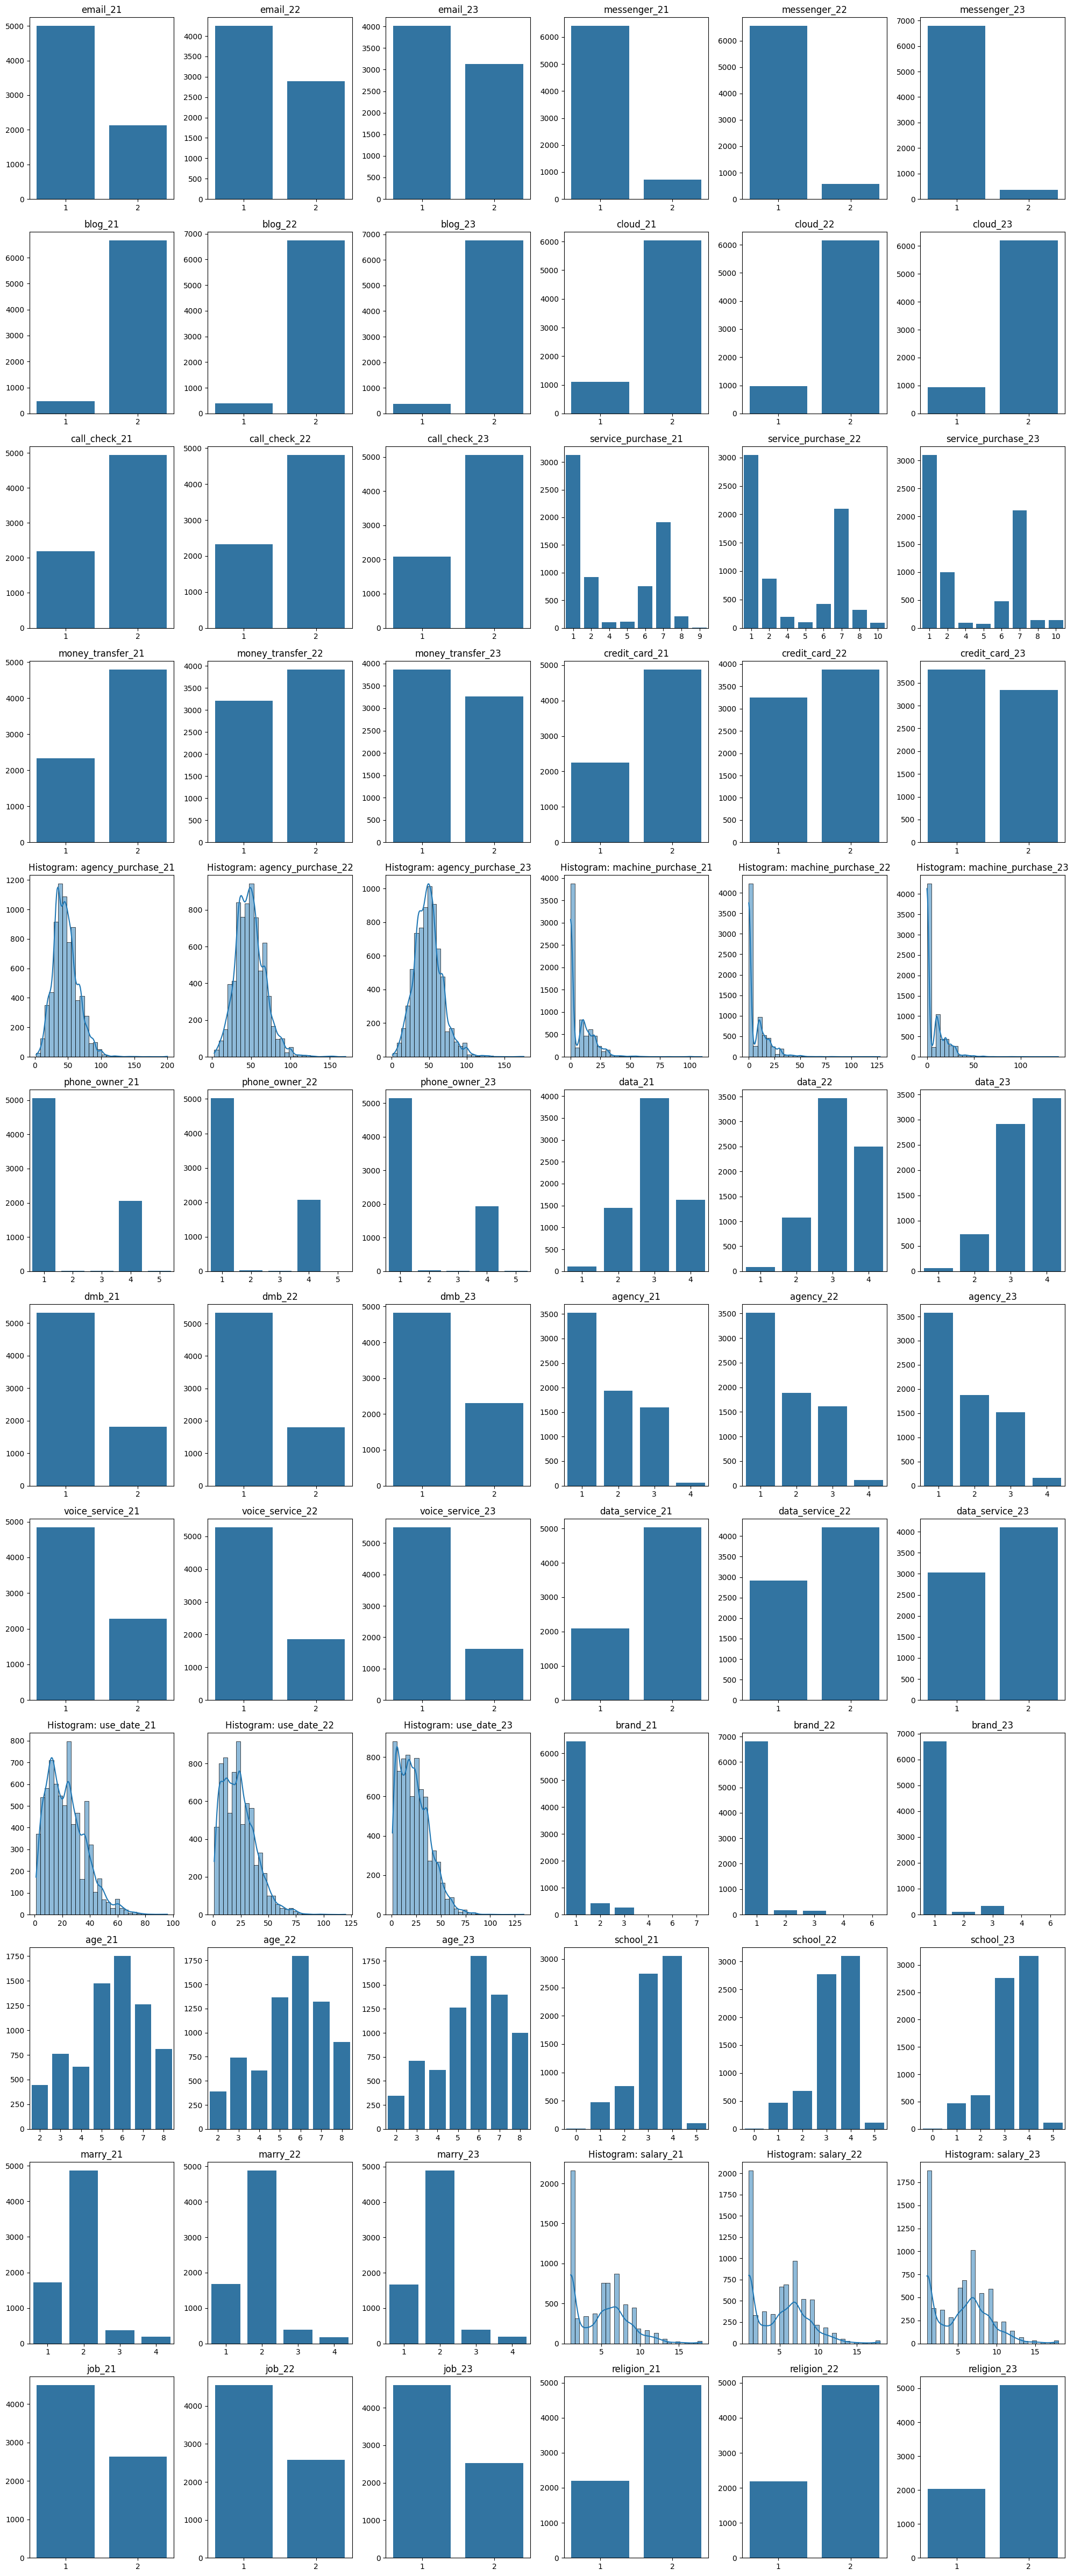

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# 확인할 변수 리스트
selected_cols = [
    'email_21', 'email_22', 'email_23',
    'messenger_21', 'messenger_22', 'messenger_23',
    'blog_21', 'blog_22', 'blog_23',
    'cloud_21', 'cloud_22', 'cloud_23',
    'call_check_21', 'call_check_22', 'call_check_23',
    'service_purchase_21', 'service_purchase_22', 'service_purchase_23',
    'money_transfer_21', 'money_transfer_22', 'money_transfer_23',
    'credit_card_21', 'credit_card_22', 'credit_card_23',
    'agency_purchase_21', 'agency_purchase_22', 'agency_purchase_23',
    'machine_purchase_21', 'machine_purchase_22', 'machine_purchase_23',
    'phone_owner_21', 'phone_owner_22', 'phone_owner_23',
    'data_21', 'data_22', 'data_23',
    'dmb_21', 'dmb_22', 'dmb_23',
    'agency_21', 'agency_22', 'agency_23',
    'voice_service_21', 'voice_service_22', 'voice_service_23',
    'data_service_21', 'data_service_22', 'data_service_23',
    'use_date_21', 'use_date_22', 'use_date_23',
    'brand_21', 'brand_22', 'brand_23',
    'age_21', 'age_22', 'age_23',
    'school_21', 'school_22', 'school_23',
    'marry_21', 'marry_22', 'marry_23',
    'salary_21', 'salary_22', 'salary_23',
    'job_21', 'job_22', 'job_23',
    'religion_21', 'religion_22', 'religion_23'
]


# 그래프 크기 설정
n_cols = 6  # 한 줄에 4개씩 출력
n_rows = (len(selected_cols) + n_cols - 1) // n_cols  # 총 행 개수

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))

# 변수별 그래프 그리기
for i, col in enumerate(selected_cols):
    ax = axes[i // n_cols, i % n_cols]  # 현재 subplot 위치
    
    if phone_df[col].nunique() > 10:  # 연속형 변수 (고유값 10개 초과)
        sns.histplot(phone_df[col], kde=True, bins=30, ax=ax)
        ax.set_title(f"Histogram: {col}")
    else:  # 범주형 변수 (고유값 10개 이하)
        sns.countplot(x=phone_df[col], ax=ax)
        ax.set_title(f"{col}")
    
    ax.set_xlabel("")  # x축 라벨 제거
    ax.set_ylabel("")

# 불필요한 빈 서브플롯 제거
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

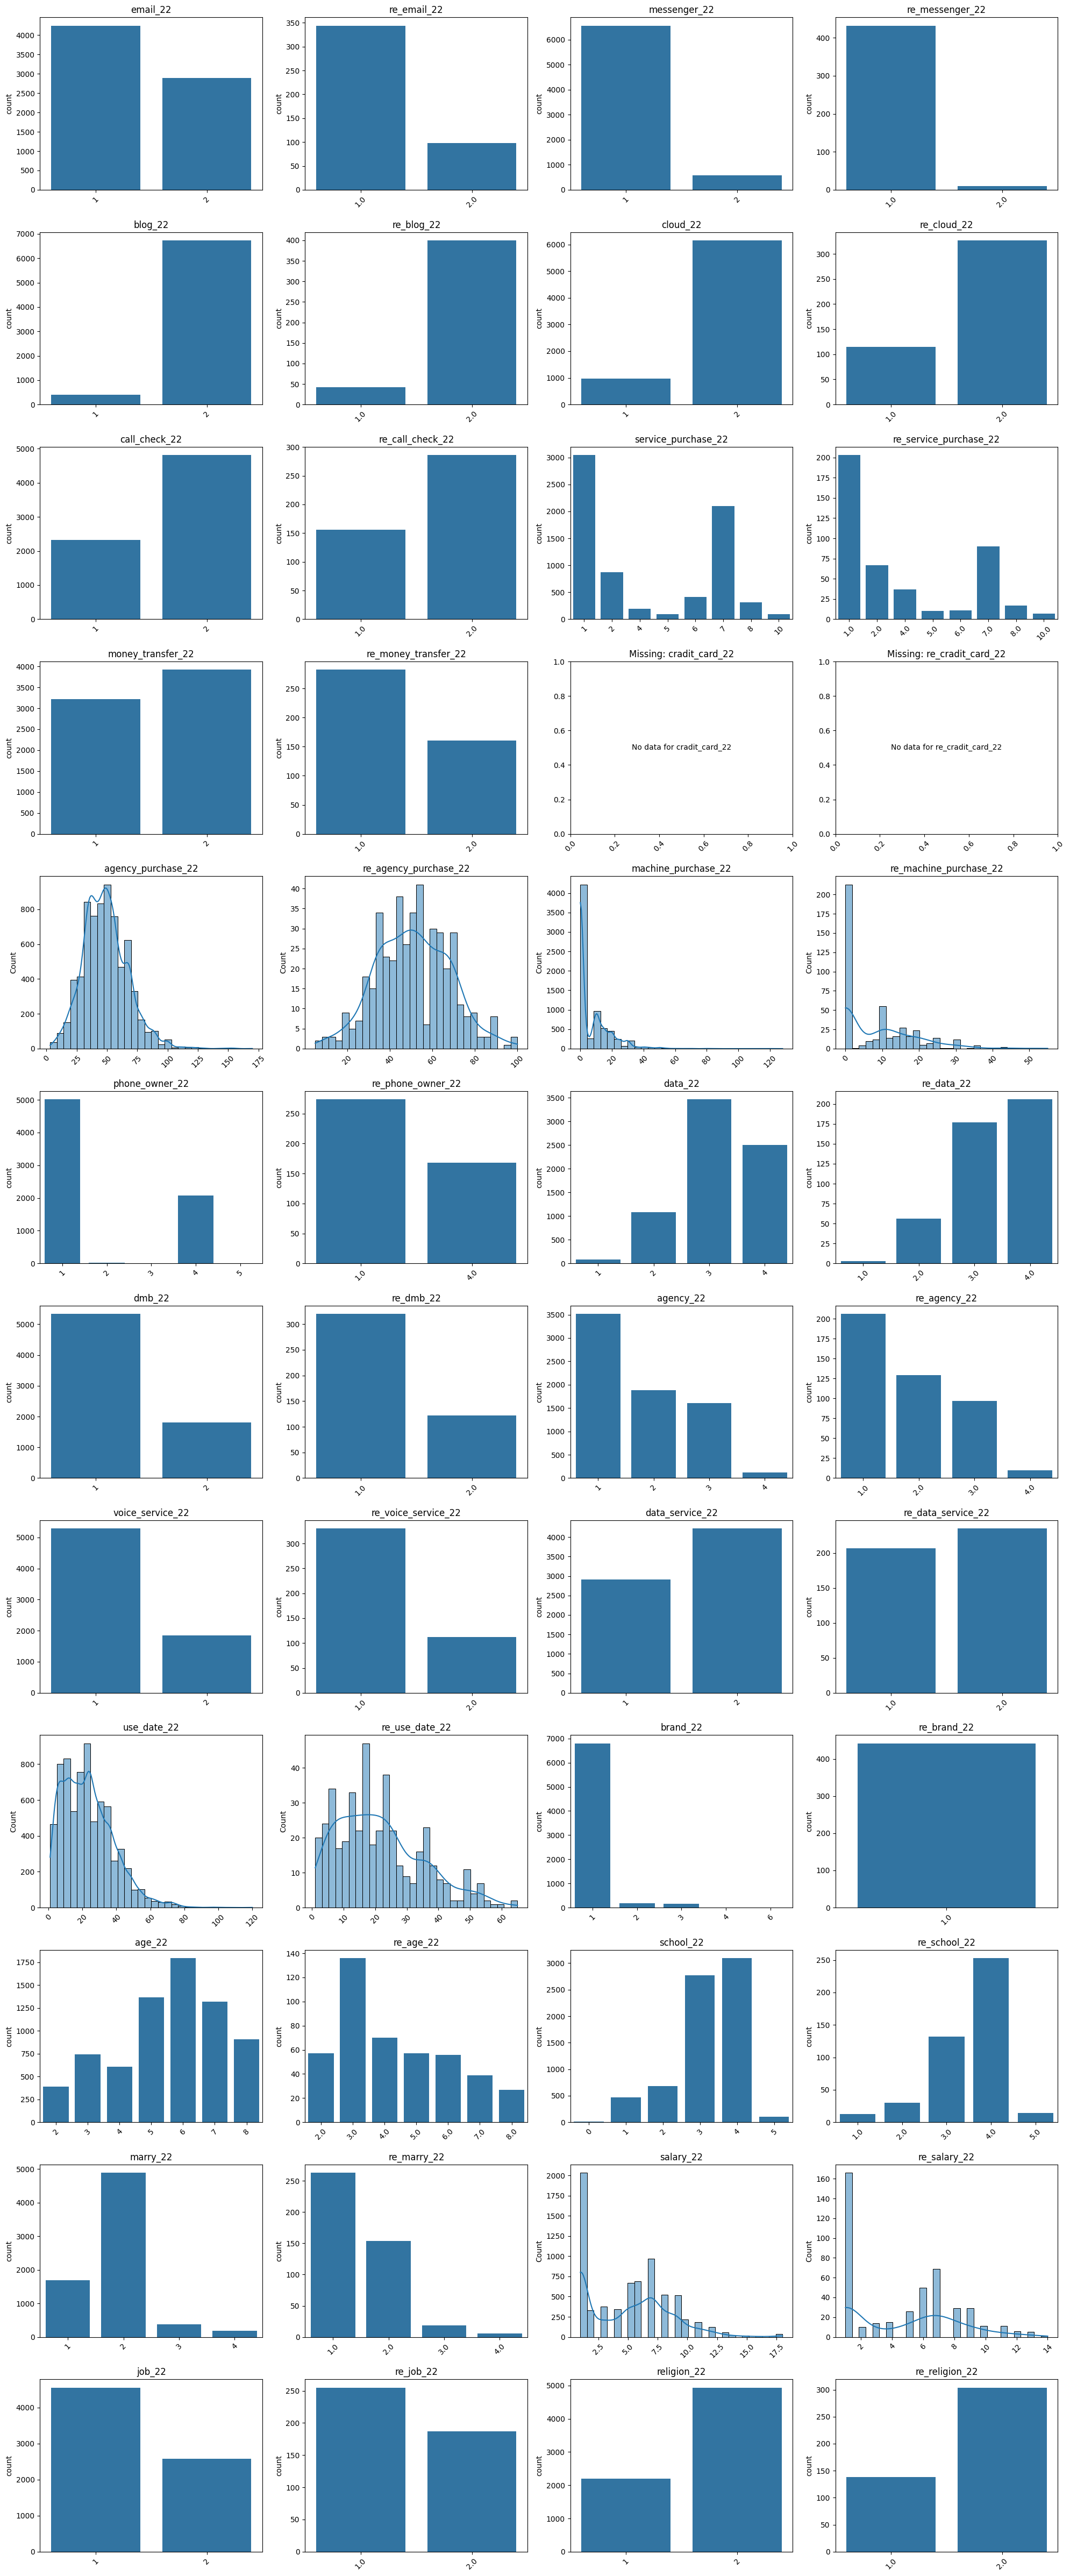

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# phone_df 대신 phone_df_with_churn 사용
df = phone_df_with_churn  # 병합된 데이터프레임 사용

# 확인할 변수 리스트
selected_cols = [
    'email_22','re_email_22',
    'messenger_22', 're_messenger_22',
    'blog_22', 're_blog_22',
    'cloud_22', 're_cloud_22',
    'call_check_22', 're_call_check_22',
    'service_purchase_22', 're_service_purchase_22',
    'money_transfer_22', 're_money_transfer_22',
    'cradit_card_22', 're_cradit_card_22',
    'agency_purchase_22', 're_agency_purchase_22',
    'machine_purchase_22', 're_machine_purchase_22',
    'phone_owner_22', 're_phone_owner_22',
    'data_22', 're_data_22',
    'dmb_22', 're_dmb_22',
    'agency_22', 're_agency_22',
    'voice_service_22', 're_voice_service_22',
    'data_service_22', 're_data_service_22',
    'use_date_22', 're_use_date_22',
    'brand_22', 're_brand_22',
    'age_22', 're_age_22',
    'school_22', 're_school_22',
    'marry_22', 're_marry_22',
    'salary_22', 're_salary_22',
    'job_22', 're_job_22',
    'religion_22', 're_religion_22',
]

# 그래프 크기 설정
n_cols = 4
n_rows = (len(selected_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))

# 변수별 그래프 그리기
for i, col in enumerate(selected_cols):
    ax = axes[i // n_cols, i % n_cols]
    
    if col in df.columns:  # 컬럼이 존재하는지 확인
        if df[col].nunique() > 10:
            sns.histplot(data=df, x=col, kde=True, bins=30, ax=ax)
        else:
            sns.countplot(data=df, x=col, ax=ax)
        ax.set_title(f"{col}")
    else:
        ax.text(0.5, 0.5, f"No data for {col}", ha='center', va='center')
        ax.set_title(f"Missing: {col}")
    
    ax.set_xlabel("")
    ax.tick_params(axis='x', rotation=45)  # x축 라벨 회전

# 불필요한 빈 서브플롯 제거
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

In [84]:
print(phone_df[phone_df['age_21'] == 1])

Empty DataFrame
Columns: [pid, email_21, messenger_21, blog_21, cloud_21, call_check_21, service_purchase_21, money_transfer_21, credit_card_21, agency_purchase_21, machine_purchase_21, phone_owner_21, data_21, dmb_21, agency_21, voice_service_21, data_service_21, use_date_21, brand_21, age_21, school_21, marry_21, salary_21, job_21, religion_21, email_22, messenger_22, blog_22, cloud_22, call_check_22, service_purchase_22, money_transfer_22, credit_card_22, agency_purchase_22, machine_purchase_22, phone_owner_22, data_22, dmb_22, agency_22, voice_service_22, data_service_22, use_date_22, brand_22, age_22, school_22, marry_22, salary_22, job_22, religion_22, email_23, messenger_23, blog_23, cloud_23, call_check_23, service_purchase_23, money_transfer_23, credit_card_23, agency_purchase_23, machine_purchase_23, phone_owner_23, data_23, dmb_23, agency_23, voice_service_23, data_service_23, use_date_23, brand_23, age_23, school_23, marry_23, salary_23, job_23, religion_23]
Index: []

[0 r

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/var/folders/kp/5_0zhw410tzf9tkb2lt76sw40000gn/T/ipykernel_7900/796042452.py:40: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/kp/5_0zhw410tzf9tkb2lt76sw40000gn/T/ipykernel_7900/796042452.py:40: UserWarning: Glyph 48652 (\N{HANGUL SYLLABLE BEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/kp/5_0zhw410tzf9tkb2lt76sw40000gn/T/ipykernel_7900/796042452.py:40: UserWarning: Glyph 47004 (\N{HANGUL SYLLABLE RAEN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/kp/5_0zhw410tzf9tkb2lt76sw40000gn/T/ipykernel_7900/796042452.py:40: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/kp/5_0zhw410tzf9tkb2lt76sw40000gn/T/ipykernel_7900/796042452.py:40: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font

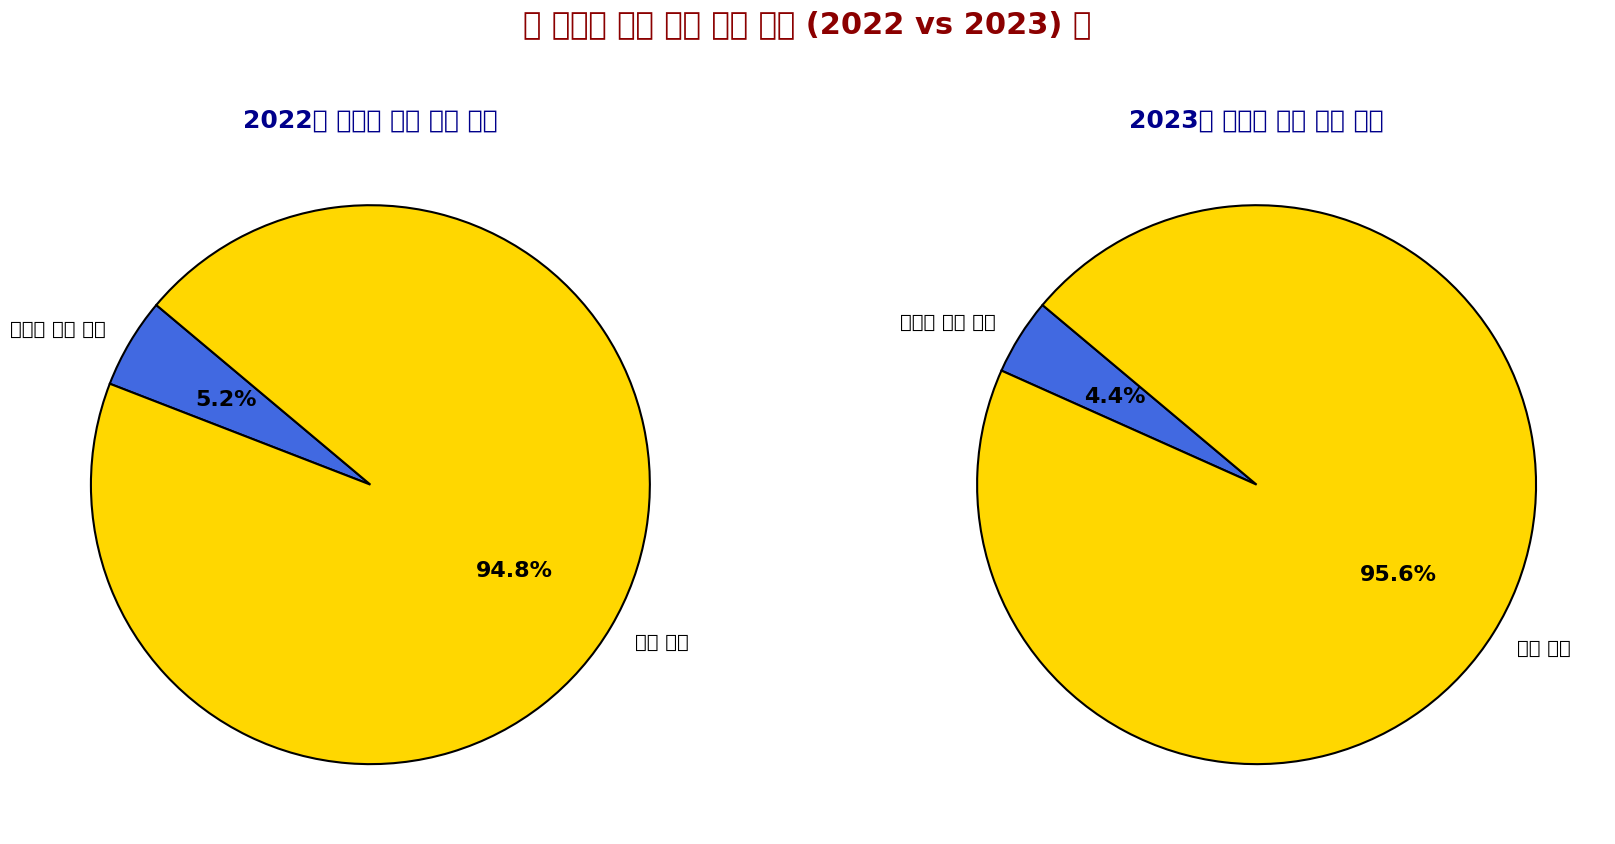

In [85]:
import matplotlib.pyplot as plt

# 데이터 설정
labels = ['브랜드 변경 고객', '유지 고객']
sizes_1 = [523, 10000 - 523]  # 예시: 전체 고객 10000명 중 523명 변경
sizes_2 = [442, 10000 - 442]  # 예시: 전체 고객 10000명 중 442명 변경

# 색상 설정
colors = ['royalblue', 'gold']

# 서브플롯 생성
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# 첫 번째 파이 차트
wedges1, texts1, autotexts1 = axes[0].pie(
    sizes_1, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5},
    textprops={'fontsize': 14, 'weight': 'bold'}
)
axes[0].set_title('2022년 브랜드 변경 고객 비율', fontsize=18, fontweight='bold', color='darkblue')

# 두 번째 파이 차트
wedges2, texts2, autotexts2 = axes[1].pie(
    sizes_2, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5},
    textprops={'fontsize': 14, 'weight': 'bold'}
)
axes[1].set_title('2023년 브랜드 변경 고객 비율', fontsize=18, fontweight='bold', color='darkblue')

# 강조 효과 적용
for autotext in autotexts1 + autotexts2:
    autotext.set_color('black')
    autotext.set_fontsize(16)
    autotext.set_weight('bold')

# 전체 제목 설정
plt.suptitle('📊 브랜드 변경 고객 비율 비교 (2022 vs 2023) 📊', fontsize=22, fontweight='bold', color='darkred', y=1.05)

# 그래프 표시
plt.tight_layout()
plt.show()

In [86]:
phone_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7134 entries, 0 to 7389
Data columns (total 73 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   pid                  7134 non-null   int64
 1   email_21             7134 non-null   int64
 2   messenger_21         7134 non-null   int64
 3   blog_21              7134 non-null   int64
 4   cloud_21             7134 non-null   int64
 5   call_check_21        7134 non-null   int64
 6   service_purchase_21  7134 non-null   int64
 7   money_transfer_21    7134 non-null   int64
 8   credit_card_21       7134 non-null   int64
 9   agency_purchase_21   7134 non-null   int64
 10  machine_purchase_21  7134 non-null   int64
 11  phone_owner_21       7134 non-null   int64
 12  data_21              7134 non-null   int64
 13  dmb_21               7134 non-null   int64
 14  agency_21            7134 non-null   int64
 15  voice_service_21     7134 non-null   int64
 16  data_service_21      7134 non

In [87]:
phone_df['call_check_21'].value_counts()

call_check_21
2    4943
1    2191
Name: count, dtype: int64

In [88]:
phone_df.describe()

,pid,email_21,messenger_21,blog_21,cloud_21,call_check_21,service_purchase_21,money_transfer_21,credit_card_21,agency_purchase_21,...,voice_service_23,data_service_23,use_date_23,brand_23,age_23,school_23,marry_23,salary_23,job_23,religion_23
count,7.134000e+03,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,...,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.00000,7134.000000,7134.000000,7134.000000
mean,4.965830e+07,1.299411,1.101486,1.933978,1.846510,1.692879,3.576395,1.673115,1.684048,46.585927,...,1.228203,1.575834,23.277965,1.110877,5.634847,3.251752,1.87118,5.330250,1.354219,1.714886
std,3.797159e+07,0.458032,0.301992,0.248338,0.360485,0.461332,2.757549,0.469108,0.464926,18.447210,...,0.419704,0.494250,15.594557,0.450134,1.678230,0.897982,0.61280,3.605569,0.478310,0.451500
min,1.000100e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,1.00000,1.000000,1.000000,1.000000
25%,1.616000e+07,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,34.000000,...,1.000000,1.000000,10.000000,1.000000,5.000000,3.000000,2.00000,1.000000,1.000000,1.000000
50%,5.066500e+07,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,45.000000,...,1.000000,2.000000,21.000000,1.000000,6.000000,3.000000,2.00000,6.000000,1.000000,2.000000
75%,6.913500e+07,2.000000,1.000000,2.000000,2.000000,2.000000,7.000000,2.000000,2.000000,56.000000,...,1.000000,2.000000,34.000000,1.000000,7.000000,4.000000,2.00000,8.000000,2.000000,2.000000
max,1.183300e+08,2.000000,2.000000,2.000000,2.000000,2.000000,9.000000,2.000000,2.000000,200.000000,...,2.000000,2.000000,134.000000,6.000000,8.000000,5.000000,4.00000,18.000000,2.000000,2.000000


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

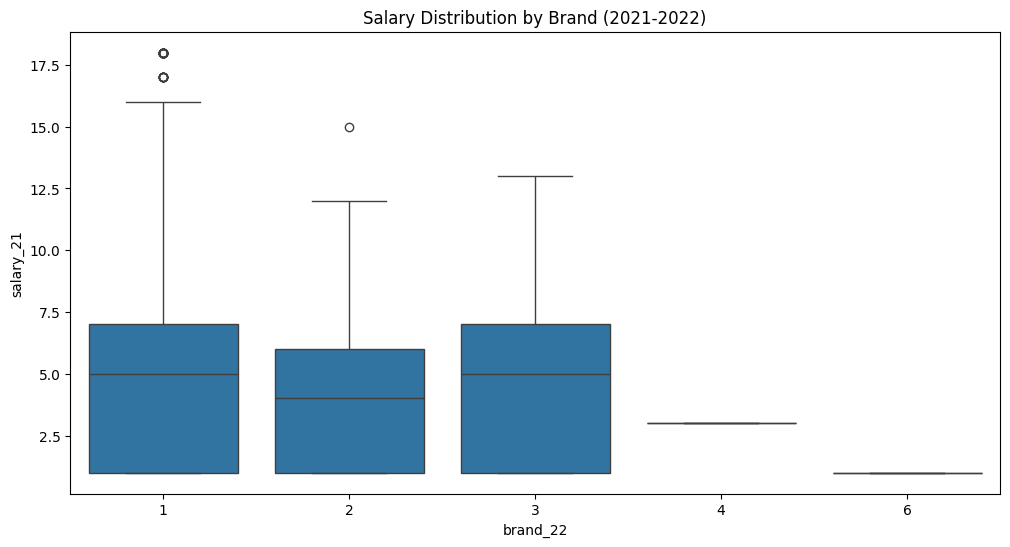

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

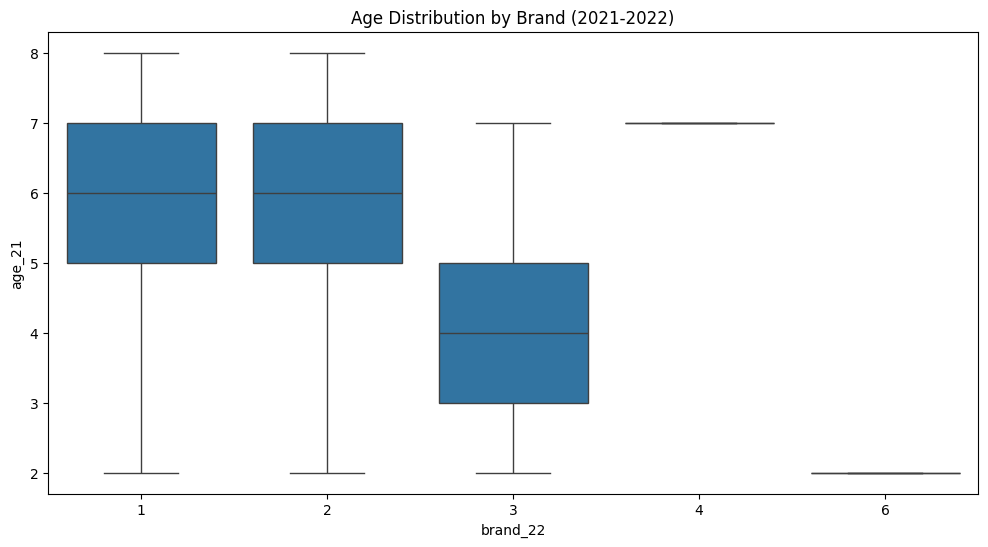

In [89]:
# 각 변수별 이탈 관계 분석 (예: salary와 이탈)
plt.figure(figsize=(12, 6))
sns.boxplot(x='brand_22', y='salary_21', data=phone_df)
plt.title('Salary Distribution by Brand (2021-2022)')
plt.show()

# 연령대별 이탈 패턴
plt.figure(figsize=(12, 6))
sns.boxplot(x='brand_22', y='age_21', data=phone_df)
plt.title('Age Distribution by Brand (2021-2022)')
plt.show()

###  2021 -> 2022 (이탈자)
###  2022 -> 2023 (이탈자)

In [90]:
# 2022년도 이탈자

# 값 빼줌
samsung_users22 = phone_df[
   (phone_df['brand_21'] == 1)
]
changed_users22 = phone_df[
   (phone_df['brand_21'] == 1) & 
   (phone_df['brand_22'] != 1)
]

# 결과 확인
print("브랜드 변경 고객 수:", len(changed_users22))
print('2022 이탈률: ', (len(changed_users22) / len(samsung_users22)))
print("\n변경된 사례:")
print(changed_users22[['pid', 'brand_21', 'brand_22']])

# 어떤 브랜드로 변경되었는지 분포 확인
brand_change_22 = changed_users22['brand_22'].value_counts()
print("\n변경된 브랜드 분포:")
print(brand_change_22)

브랜드 변경 고객 수: 333
2022 이탈률:  0.05174825174825175

변경된 사례:
            pid  brand_21  brand_22
1         10002         1         3
65       440001         1         2
67       440004         1         2
96       600005         1         3
98       620001         1         3
...         ...       ...       ...
7166  115420002         1         2
7217  115910001         1         2
7278  116530001         1         3
7279  116530002         1         3
7288  116720002         1         2

[333 rows x 3 columns]

변경된 브랜드 분포:
brand_22
2    176
3    155
6      1
4      1
Name: count, dtype: int64


In [91]:
# 2023년도 이탈자

changed_users23 = phone_df[
   (phone_df['brand_22'] == 1) & 
   (phone_df['brand_23'] != 1)
]

samsung_users23 = phone_df[
   (phone_df['brand_22'] == 1) 
]

print('2022 이탈률: ', (len(changed_users23) / len(samsung_users23)))

# 결과 확인
print("브랜드 변경 고객 수:", len(changed_users23))
print("\n변경된 사례:")
print(changed_users23[['pid', 'brand_22', 'brand_23']])

# 어떤 브랜드로 변경되었는지 분포 확인
brand_change_23 = changed_users23['brand_23'].value_counts()
print("\n변경된 브랜드 분포:")
print(brand_change_23)


2022 이탈률:  0.06499044258197324
브랜드 변경 고객 수: 442

변경된 사례:
            pid  brand_22  brand_23
18       100002         1         3
21       160001         1         2
37       300003         1         3
38       300004         1         3
41       310003         1         3
...         ...       ...       ...
7216  115890003         1         3
7219  115910004         1         3
7298  116990001         1         2
7302  117020001         1         2
7324  117300001         1         2

[442 rows x 3 columns]

변경된 브랜드 분포:
brand_23
3    329
2    106
4      4
6      3
Name: count, dtype: int64


In [92]:
# 2023년도 복귀자       ->     복귀자는 다시 생각해보겠지만 일단 이탈자만 생각하기로 함

returned_users = phone_df[
    (phone_df['brand_21'] == 1) &
   (phone_df['brand_22'] != 1) & 
   (phone_df['brand_23'] == 1)
]

# 결과 확인
print("브랜드 변경 고객 수:", len(returned_users))
print("\n변경된 사례:")
print(returned_users[['pid', 'brand_21', 'brand_22', 'brand_23']])

# 어떤 브랜드로 변경되었는지 분포 확인
brand_return_23 = returned_users['brand_23'].value_counts()
print("\n변경된 브랜드 분포:")
print(brand_return_23)

브랜드 변경 고객 수: 333

변경된 사례:
            pid  brand_21  brand_22  brand_23
1         10002         1         3         1
65       440001         1         2         1
67       440004         1         2         1
96       600005         1         3         1
98       620001         1         3         1
...         ...       ...       ...       ...
7166  115420002         1         2         1
7217  115910001         1         2         1
7278  116530001         1         3         1
7279  116530002         1         3         1
7288  116720002         1         2         1

[333 rows x 4 columns]

변경된 브랜드 분포:
brand_23
1    333
Name: count, dtype: int64


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/var/folders/kp/5_0zhw410tzf9tkb2lt76sw40000gn/T/ipykernel_7900/2660898575.py:30: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/kp/5_0zhw410tzf9tkb2lt76sw40000gn/T/ipykernel_7900/2660898575.py:30: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/kp/5_0zhw410tzf9tkb2lt76sw40000gn/T/ipykernel_7900/2660898575.py:30: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found

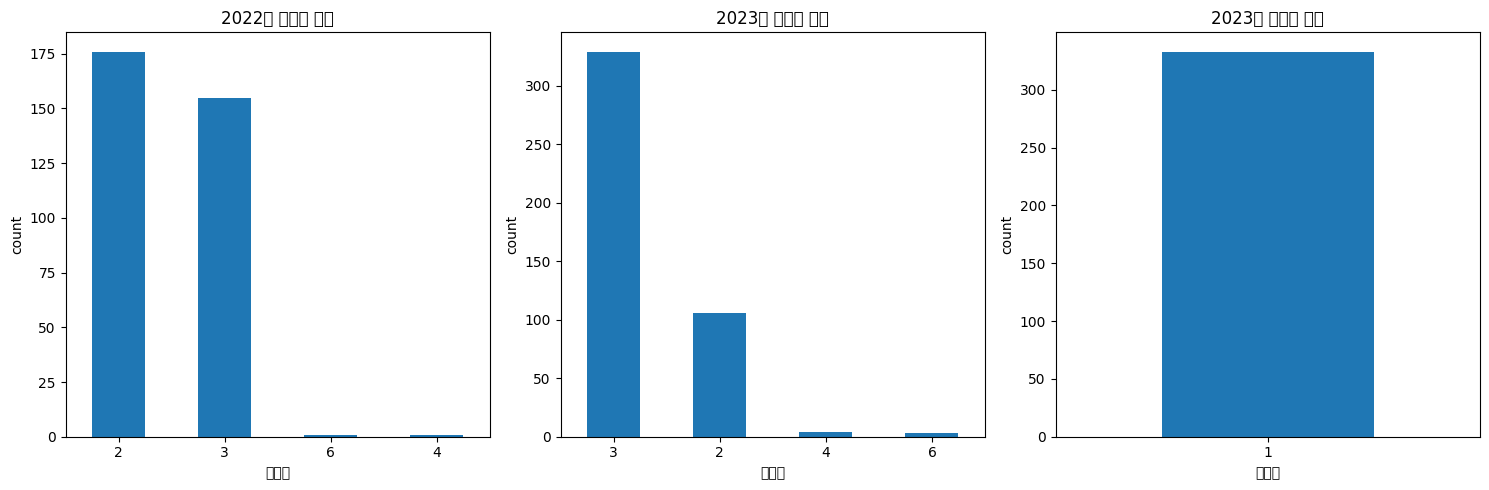

In [93]:
# 시각화 자료로 이탈자, 복귀자 확인

# 서브플롯 생성
plt.figure(figsize=(15, 5))

# 2021년 데이터
plt.subplot(1, 3, 1)
brand_change_22.plot(kind='bar')
plt.title('2022년 이탈자 분포')
plt.xlabel('제조사')
plt.ylabel('count')
plt.xticks(rotation=0)

# 2022년 데이터
plt.subplot(1, 3, 2)
brand_change_23.plot(kind='bar')
plt.title('2023년 이탈자 분포')
plt.xlabel('제조사')
plt.ylabel('count')
plt.xticks(rotation=0)

# 2023년 데이터
plt.subplot(1, 3, 3)
brand_return_23.plot(kind='bar')
plt.title('2023년 복귀자 분포')
plt.xlabel('제조사')
plt.ylabel('count')
plt.xticks(rotation=0)

plt.tight_layout()

plt.show()

In [103]:
total_customer = phone_df['pid'].count()
print(f'전체 인원 수 :{total_customer}')

total_samsung_21 = phone_df[phone_df['brand_21'] == 1]['brand_21'].count()
print(f'21년도 삼성 인원 수 :{total_samsung_21}')
total_samsung_22 = phone_df[phone_df['brand_22'] == 1]['brand_22'].count()
print(f'22년도 삼성 인원 수 :{total_samsung_22}')

print(len(changed_users22) /total_samsung_21)
print(len(changed_users23) / total_samsung_22)
total_samsung_23 = phone_df[phone_df['brand_23'] == 1]['brand_23'].count()
print(f'23년도 삼성 인원 수 :{total_samsung_23}')

total_chaged = len(changed_users22) + len(changed_users23)

print(f'전체 이탈자 수 :{total_chaged}')

total_merged = phone_df[phone_df['brand_23'] == 1]['brand_23'].count() + total_chaged
print(f'이탈자를 포함한 총 고객 수 :{total_merged}')

전체 인원 수 :7134
21년도 삼성 인원 수 :6435
22년도 삼성 인원 수 :6801
0.05174825174825175
0.06499044258197324
23년도 삼성 인원 수 :6692
전체 이탈자 수 :775
이탈자를 포함한 총 고객 수 :7467


In [95]:
phone_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7134 entries, 0 to 7389
Data columns (total 73 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   pid                  7134 non-null   int64
 1   email_21             7134 non-null   int64
 2   messenger_21         7134 non-null   int64
 3   blog_21              7134 non-null   int64
 4   cloud_21             7134 non-null   int64
 5   call_check_21        7134 non-null   int64
 6   service_purchase_21  7134 non-null   int64
 7   money_transfer_21    7134 non-null   int64
 8   credit_card_21       7134 non-null   int64
 9   agency_purchase_21   7134 non-null   int64
 10  machine_purchase_21  7134 non-null   int64
 11  phone_owner_21       7134 non-null   int64
 12  data_21              7134 non-null   int64
 13  dmb_21               7134 non-null   int64
 14  agency_21            7134 non-null   int64
 15  voice_service_21     7134 non-null   int64
 16  data_service_21      7134 non

In [96]:
phone_df.describe()

,pid,email_21,messenger_21,blog_21,cloud_21,call_check_21,service_purchase_21,money_transfer_21,credit_card_21,agency_purchase_21,...,voice_service_23,data_service_23,use_date_23,brand_23,age_23,school_23,marry_23,salary_23,job_23,religion_23
count,7.134000e+03,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,...,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.000000,7134.00000,7134.000000,7134.000000,7134.000000
mean,4.965830e+07,1.299411,1.101486,1.933978,1.846510,1.692879,3.576395,1.673115,1.684048,46.585927,...,1.228203,1.575834,23.277965,1.110877,5.634847,3.251752,1.87118,5.330250,1.354219,1.714886
std,3.797159e+07,0.458032,0.301992,0.248338,0.360485,0.461332,2.757549,0.469108,0.464926,18.447210,...,0.419704,0.494250,15.594557,0.450134,1.678230,0.897982,0.61280,3.605569,0.478310,0.451500
min,1.000100e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,1.00000,1.000000,1.000000,1.000000
25%,1.616000e+07,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,34.000000,...,1.000000,1.000000,10.000000,1.000000,5.000000,3.000000,2.00000,1.000000,1.000000,1.000000
50%,5.066500e+07,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,45.000000,...,1.000000,2.000000,21.000000,1.000000,6.000000,3.000000,2.00000,6.000000,1.000000,2.000000
75%,6.913500e+07,2.000000,1.000000,2.000000,2.000000,2.000000,7.000000,2.000000,2.000000,56.000000,...,1.000000,2.000000,34.000000,1.000000,7.000000,4.000000,2.00000,8.000000,2.000000,2.000000
max,1.183300e+08,2.000000,2.000000,2.000000,2.000000,2.000000,9.000000,2.000000,2.000000,200.000000,...,2.000000,2.000000,134.000000,6.000000,8.000000,5.000000,4.00000,18.000000,2.000000,2.000000


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

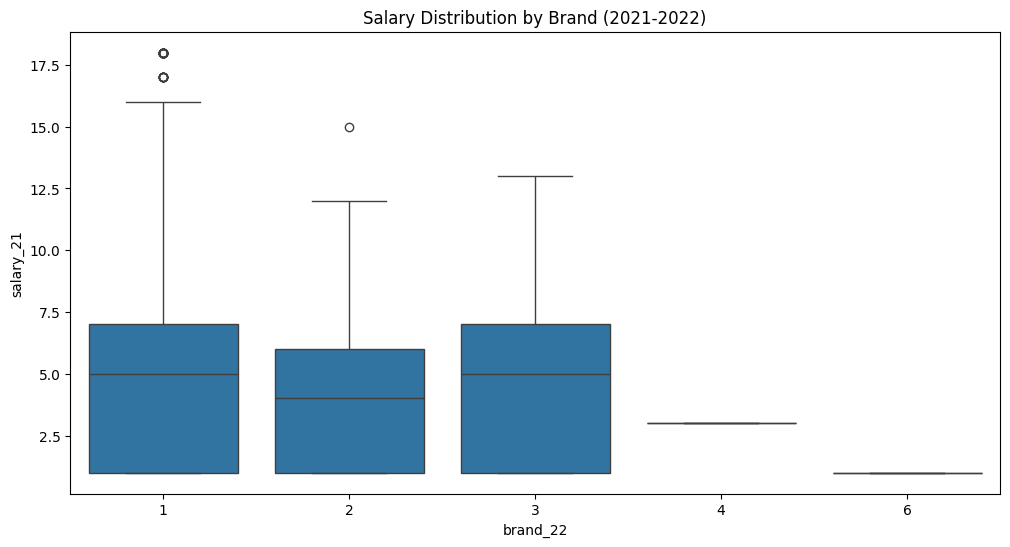

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

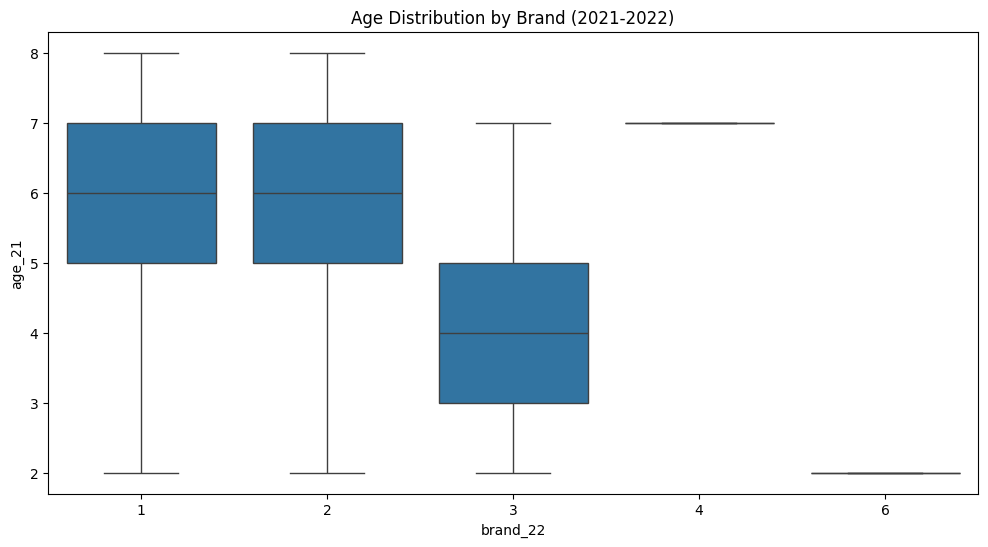

In [97]:
# 각 변수별 이탈 관계 분석 (예: salary와 이탈)
plt.figure(figsize=(12, 6))
sns.boxplot(x='brand_22', y='salary_21', data=phone_df)
plt.title('Salary Distribution by Brand (2021-2022)')
plt.show()

# 연령대별 이탈 패턴
plt.figure(figsize=(12, 6))
sns.boxplot(x='brand_22', y='age_21', data=phone_df)
plt.title('Age Distribution by Brand (2021-2022)')
plt.show()

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

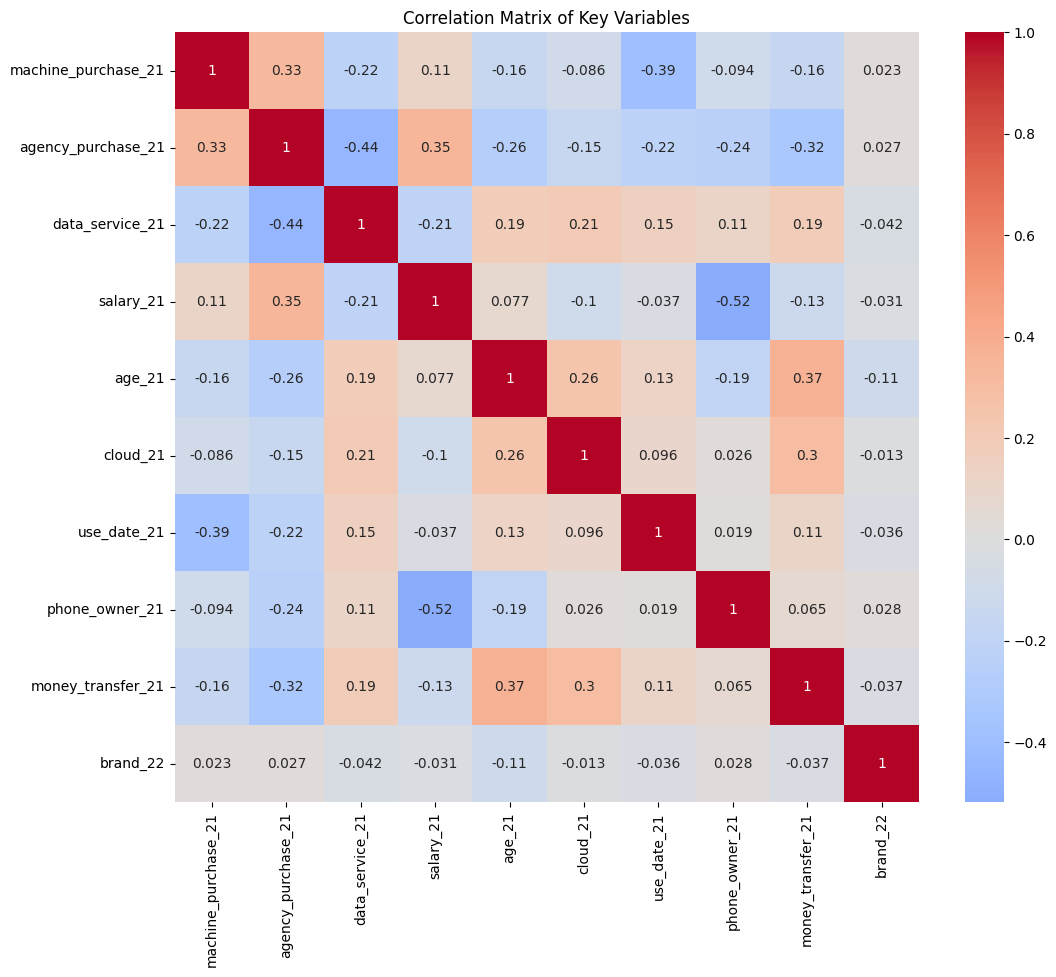

In [98]:
# 주요 변수들의 상관관계 분석
selected_columns = ['machine_purchase_21', 'agency_purchase_21', 'data_service_21', 
                   'salary_21', 'age_21', 'cloud_21', 'use_date_21', 
                   'phone_owner_21', 'money_transfer_21', 'brand_22']

correlation_matrix = phone_df[selected_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Key Variables')
plt.show()

<Figure size 1000x600 with 0 Axes>

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

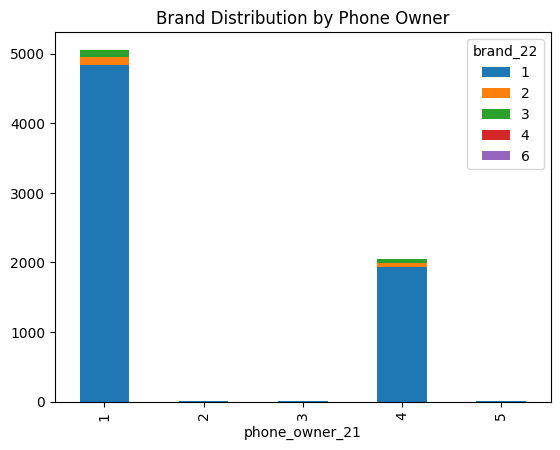

In [99]:
# 범주형 변수의 이탈 관계 분석 (예: phone_owner와 이탈)
plt.figure(figsize=(10, 6))
pd.crosstab(phone_df['phone_owner_21'], phone_df['brand_22']).plot(kind='bar', stacked=True)
plt.title('Brand Distribution by Phone Owner')
plt.show()

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

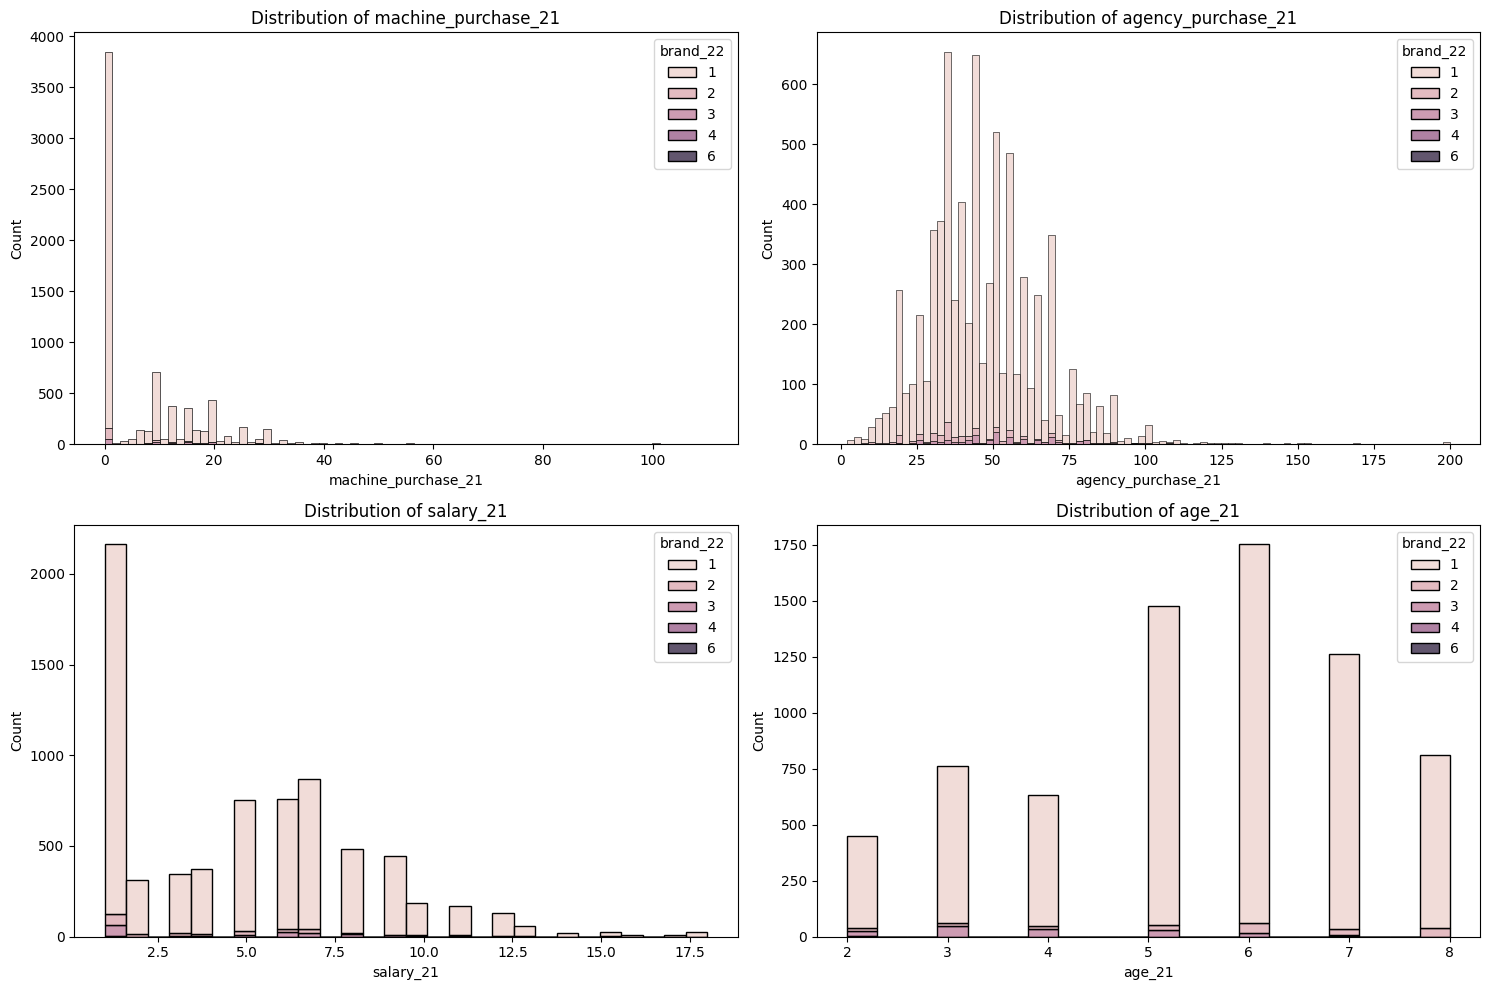

In [100]:
# 연속형 변수들의 분포 확인
plt.figure(figsize=(15, 10))

for i, col in enumerate(['machine_purchase_21', 'agency_purchase_21', 
                        'salary_21', 'age_21'], 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=phone_df, x=col, hue='brand_22', multiple="stack")
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

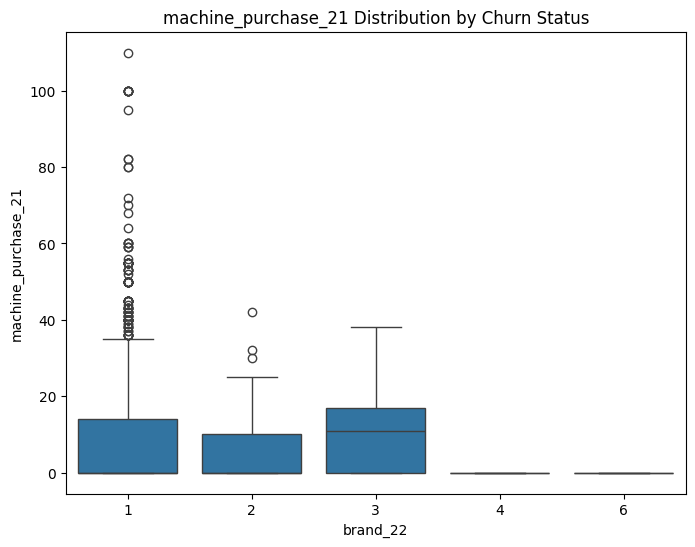

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

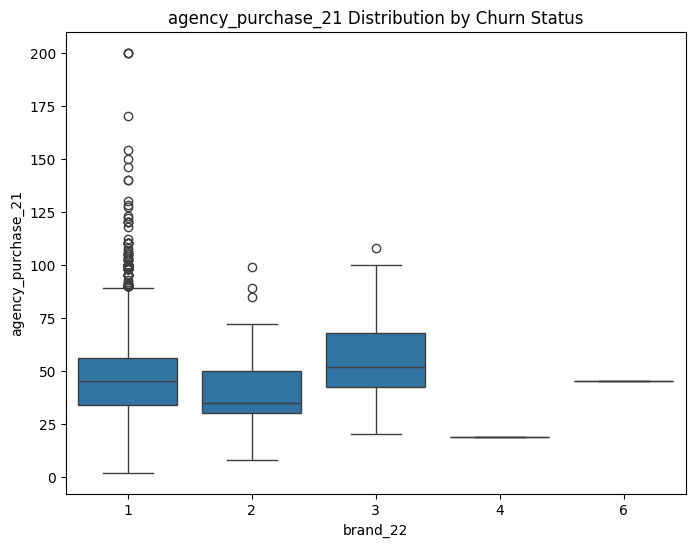

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

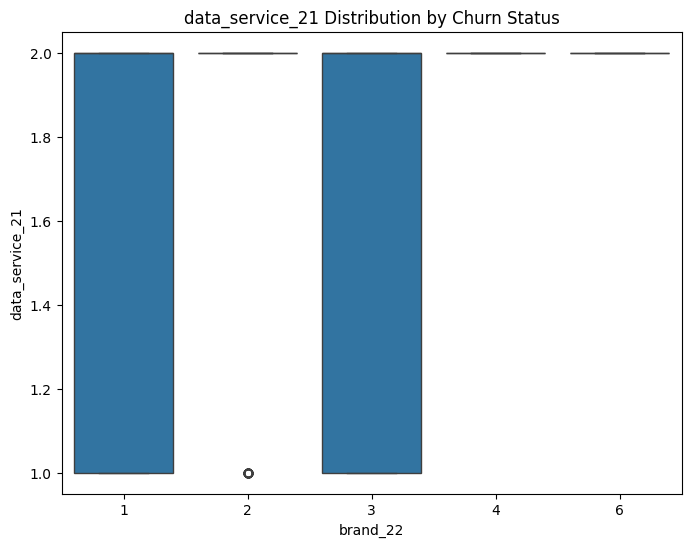

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

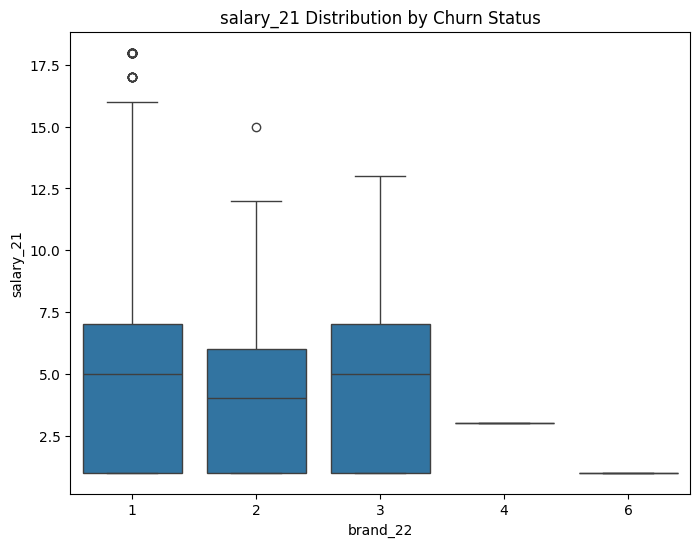

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

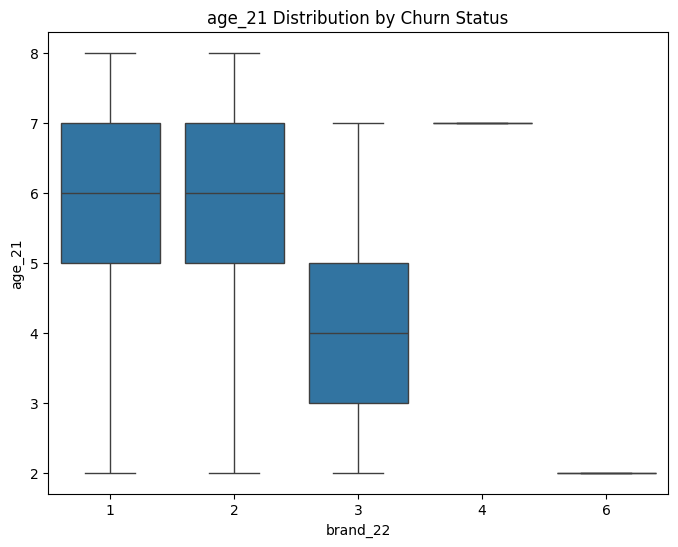

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

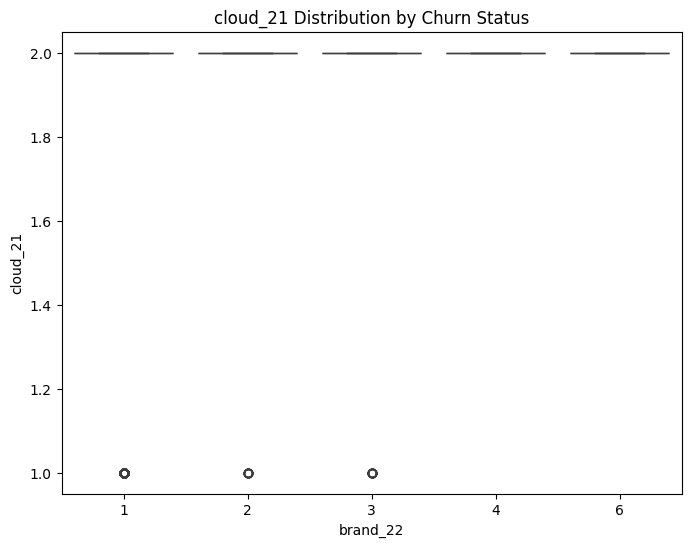

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

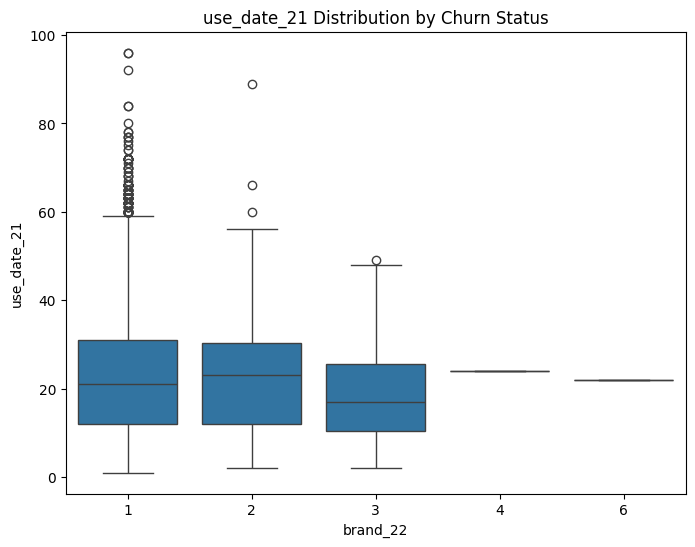

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

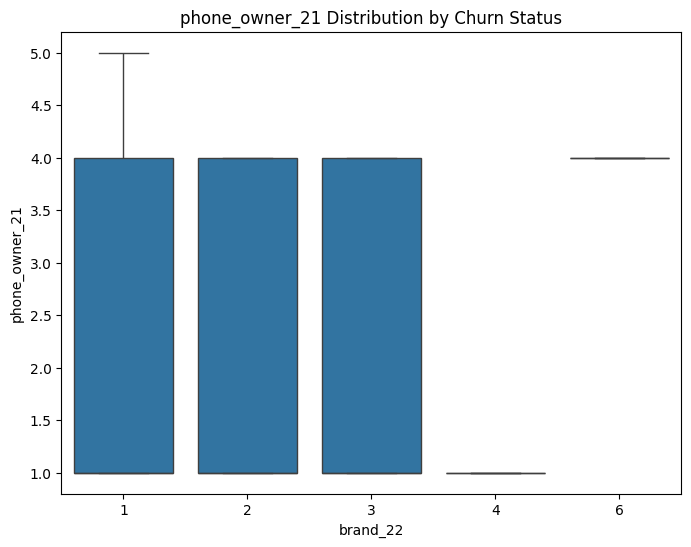

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

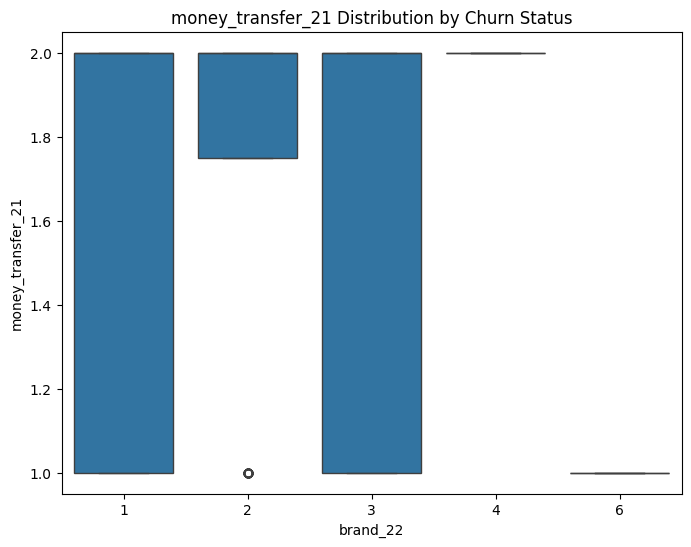

In [101]:
# 이탈 고객의 특성 분석
churn_customers = phone_df[phone_df['brand_22'] != phone_df['brand_21']]
non_churn_customers = phone_df[phone_df['brand_22'] == phone_df['brand_21']]

# 이탈 고객과 비이탈 고객의 특성 비교
for col in selected_columns[:-1]:  # brand_22 제외
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=phone_df, x='brand_22', y=col)
    plt.title(f'{col} Distribution by Churn Status')
    plt.show()

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

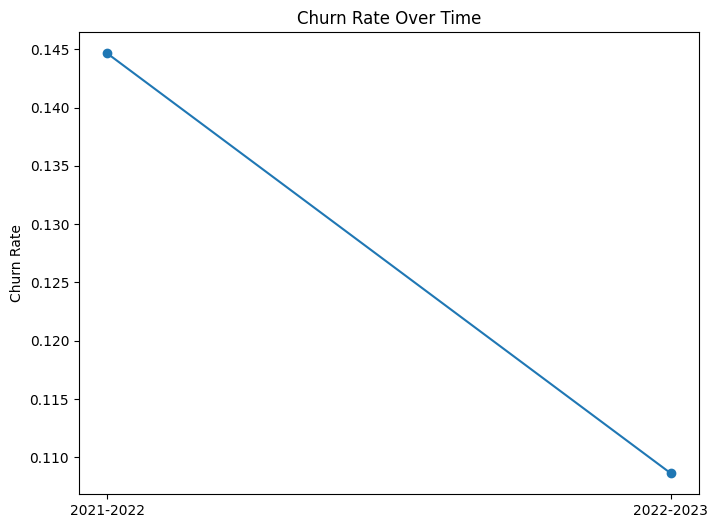

In [102]:
# 연도별 이탈률 변화
churn_rates = []
for year in [22, 23]:
    prev_year = year - 1
    churn_rate = len(phone_df[phone_df[f'brand_{year}'] != phone_df[f'brand_{prev_year}']]) / len(phone_df)
    churn_rates.append(churn_rate)

plt.figure(figsize=(8, 6))
plt.plot(['2021-2022', '2022-2023'], churn_rates, marker='o')
plt.title('Churn Rate Over Time')
plt.ylabel('Churn Rate')
plt.show()

실 데이터 훈련 수

- total_merged  이탈자를 합한 총 데이터
- total_chaged  이탈자 데이터
    - 이탈자의 총 비율 total_changed / totla_merged

---